<center>

  # Uvod u podatkovnu znanost
  ## Analiza podataka o elektroničkoj trgovini s bazom u UK
  ### Mia Mužinić i Marijana Rendulić
  #### 2022./2023.

</center>

# **Sadržaj**


1. <a href='#1'>Uvod</a>
2. <a href='#2'>Skup podataka i korištene biblioteke</a>
3. <a href='#3'>Nedostajuće vrijednosti i sređivanje podataka</a>
4. <a href='#4'>Analiza podataka</a>
5. <a href='#5'>Segmentacija kupaca - RFM analiza</a>
      - <a href='#5.1.'>Kategorije proizvoda</a>
      - <a href='#5.2.'>Kategorije kupaca</a>
      - <a href='#5.3.'>Klasifikacija kupaca</a>
        *   <a href='#5.3.1.'>Support Vector Machine (SVM)</a>
        *   <a href='#5.3.2.'>Logistička regresija</a>
        *   <a href='#5.3.3.'>K-najbližih susjeda</a>
        *   <a href='#5.3.4.'>Stablo odluke</a>
        *   <a href='#5.3.5.'>Slučajna šuma</a>
6. <a href='#6'>Zaključak</a>
7. <a href='#7'>Literatura</a>




## **1. Uvod**


U ovom projektu bavimo se analizom podataka o elektroničkoj trgovini s bazom u UK. Globalizacija i razvoj informacijske tehnologije doveli su do sve veće upotrebe interneta u svim sektorima djelatnosti, pa tako i u trgovini. Maloprodajne tvrtke pokušavaju se diferencirati od konkurencije pa počinju uvoditi online trgovine umjesto tradicionalnih prodajnih mjesta. Tvrtke nastoje pružiti upravo ono što kupci traže i na najbolji mogući način ispuniti njihova očekivanja, potrebe i želje. Ovaj projekt bavi se pojmom online trgovine koja danas postaje sve važniji dio cjelokupnog poslovanja poduzeća. Istražit će se kako funkcionira kupnja putem interneta, utječe li doba godine, ali i dana o ukupnoj prodaji, kao i kako se ukupna prodaja razlikuje po državama. Cilj samog projekta je pokazati kroz segmentaciju kupaca predviđanje vrste kupnje koju će kupac obaviti, kao i broj posjeta koje će napraviti tijekom godine, i to od prvog posjeta Internet trgovini. Danas je online kupnja gotovo najbrži i najjeftiniji način kupnje proizvoda i usluga. Na samom početku smo se dogovorile da ćemo obje proučiti o Internet prodaji općenito, kako bismo što bolje bile spremne odgovoriti zahtjevima projekta. Nakon toga je bilo potrebno napraviti analizu odabranog seta podataka. Kroz razne vizualizacije prikazani su odnosi među značajkama, te smo tako mogle zaključiti koje varijable su značajnije i pridonose optimizaciji Internet trgovina. S obzirom na činjenicu da smo dvije radile na projektu, nije došlo do striktne raspodjele posla, već je projekt odrađen tako da smo zajedno sudjelovale u cjelokupnoj izradi, tj. od analize i vizualizacije podataka do samog predviđanja. 

Neka od pitanja na koja smo dale odgovor su:
- prikaz osnovnih pojedinosti o podacima
- nedostajuće vrijednosti
- otkazane narudžbe
- iz kojeg su vremenskog perioda podaci
- raspodjela narudžbi po državama
- najprodavaniji proizvod
- mjesečni prihod proizvoda
- koji su predmeti prodani u najunosnijim mjesecima
- prodaja po mjesecima, tjednima, danima i satima
- srednja ukupna cijena narudžbe po mjesecima
- prosječna vrijednost transakcije i prosječna količina proizvoda po transakciji
- kako se ukupna prodaja i broj transakcija razlikuju po državama
- mjesečni prosječni broj faktura
- tko je često kupovao u trgovini
- tko su najvjerniji klijenti
- koliko kupaca je kupilo samo jedan proizvod
- koliko nedavno su kupci kupili proizvod
- koliko dana je prošlo od prve i posljednje kupovine oređenog kupca 
- koliko često se kupuje određeni proizvod
- tko su najprofitabilniji potrošači ove trgovine


## **2. Skup podataka i korištene biblioteke**

### Korištene biblioteke

Implementacija korištenih biblioteka u projektu: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot

from wordcloud import WordCloud, STOPWORDS

import datetime, nltk 

import warnings
warnings.filterwarnings('ignore')

import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
%matplotlib inline

Pojasnimo korištene biblioteke za analizu podataka i vizualizaciju.
* **Pandas** je biblioteka u Pythonu koja se široko koristi za manipulaciju i analizu podataka. Pruža strukture podataka kao što su serije (1-dimenzionalne) i DataFrame (2-dimenzionalne) koje nam omogućuju jednostavno rukovanje i analizu podataka. Funkcije pd.read_* omogućuju nam jednostavno čitanje različitih vrsta podataka, kao što su CSV ili Excel datoteke, u DataFrame. Metode df.head() ili df.tail() omogućuju nam da brzo pregledamo prvih, odnosno zadnjih nekoliko redaka DataFramea. Osim toga, nudi široku paletu opcija sređivanja i čišćenja podataka kao što su spajanje, grupiranje, rukovanje podacima koji nedostaju itd.

* **NumPy** je biblioteka za znanstveno računalstvo u Pythonu koja pruža podršku za velike, višedimenzionalne nizove i matrice numeričkih podataka, kao i veliku zbirku matematičkih funkcija za rad s tim nizovima. Često se koristi kao ovisnost za druge biblioteke kao što je pandas.

* **Seaborn** je biblioteka za vizualizaciju statističkih podataka izgrađena na temelju matplotliba. Omogućuje sučelje visoke razine za stvaranje atraktivne i informativne statističke grafike. Često se koristi za stvaranje informativnih vizualizacija statističkih podataka.

* **Matplotlib** je biblioteka za crtanje za programski jezik Python i njegovo numeričko matematičko proširenje NumPy. Omogućuje objektno orijentirani API za ugrađivanje crteža u aplikacije pomoću GUI alata opće namjene kao što su Tkinter, wxPython, Qt ili GTK. To je temelj mnogih drugih biblioteka crtanja, kao što su seaborn i pandas.

### Skup podataka

**Učitavanje skupa podataka.**

Skup podataka (engl. Dataset) je pronađen na Internetu (link: https://www.kaggle.com/datasets/carrie1/ecommerce-data?datasetId=1985&sortBy=voteCount). Naziv skupa podataka je "data.csv", a veličina mu je 45.58 MB. Uvezli smo na početku biblioteku "pandas" kako bi podatke spremili u varijablu "data".

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Projekt_Mužinić_Rendulić/data.csv", encoding='latin1')

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom





U prethodnoj tablici se može vidjeti kako izgledaju prvih pet podataka iz dataseta. Vidimo da su podaci strukturirani u tablicu (pomoću redova i stupaca). 

Vidimo da se podaci sastoje od 8 varijabli:

- InvoiceNo: Broj fakture, nominalni 6-znamenkasti broj jedinstveno dodijeljen svakoj transakciji. Ako ovaj kod počinje slovom 'c', označava otkazivanje.

- StockCode: Šifra proizvoda (artikla), nominalni 5-znamenkasti broj jedinstveno dodijeljen svakom posebnom proizvodu

- Description: Naziv proizvoda (artikla)

- Quantity: Količine svakog proizvoda (stavke) po transakciji, numerički

- InvoiceDate: datum i vrijeme računa, odnosno generiranja transakcije, numerički

- UnitPrice: Jedinična cijena, odnosno cijena proizvoda po jedinici u funtama, numerički

- CustomerID: Broj kupca, nominalni 5-znamenkasti broj jedinstveno dodijeljen svakom kupcu

- Country: Naziv države iz koje je transakcija, nominalno

Pogledajmo osnovne pojmove o skupu podataka:
- shape, nazive stupaca, broj duplih podataka, broj nedostajućih vrijednosti, broj jedinstvenih vrijednosti, pojedinost i retcima skupa podataka

In [ ]:
def data_describe():
    print("-"*20)
    print("Shape of the dataset")
    print("-"*20)
    print(str(data.shape) + "\n")
    print("Columns of the dataset")
    print("-"*20)
    print(str(data.columns.to_list()) + "\n")
    print("Data duplication ")
    print("-"*20)
    print(str(data.duplicated(keep=False).sum()) + "\n")
    print("Missing Values")
    print("-"*20)
    print(str(data.isnull().sum()) + "\n")
    print("Unique Values")
    print("-"*20)
    print(str(data.nunique()) + "\n")
    print("Columns info")
    print("-"*20)
    print(str(data.info()) + "\n")
    print("-"*20)

data_describe()

--------------------
Shape of the dataset
--------------------
(541909, 8)

Columns of the dataset
--------------------
['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']

Data duplication 
--------------------
10147

Missing Values
--------------------
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Unique Values
--------------------
InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

Columns info
--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   Stock

## **3. Nedostajuće vrijednosti i sređivanje podataka**

Nakon što smo vidjele osnovne pojmove o skupu podataka, uočile smo da postoje nedostajuće vrijednosti te tražimo njihov postotak u svakom stupcu.

Do gubitka podataka može doći iz različitih razloga, uključujući netočan unos podataka, kvarove uređaja, izgubljene datoteke i još mnogo toga. Svaki skup podataka obično sadrži neke podatke koji nedostaju.


Na sljedećoj vizualizaciji crvenom bojom (True) označene su vrijednosti koje nedostaju, a plavom (False) ostale vrijednosti.

<Figure size 1080x720 with 0 Axes>

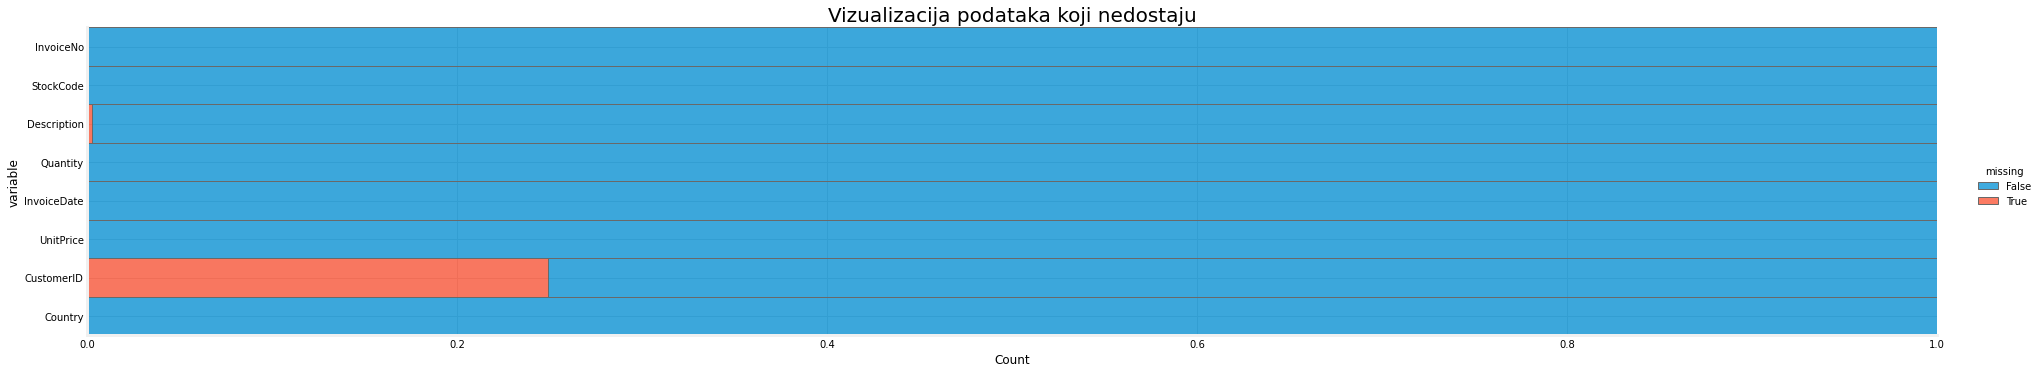

In [ ]:
plt.figure(figsize=(15,10))
sns.displot(
    data=data.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=5.50
)

plt.title("Vizualizacija podataka koji nedostaju", fontsize = 20)
plt.show()

In [ ]:
missing_percentage = data.isnull().sum() / data.shape[0] * 100
print("Postotak nedostajućih vrijednosti")
missing_perc=missing_percentage.sort_values(ascending=False)
missing_perc

Postotak nedostajućih vrijednosti


CustomerID     24.926694
Description     0.268311
InvoiceNo       0.000000
StockCode       0.000000
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
Country         0.000000
dtype: float64

Zaključak: Gotovo 25% korisničkih ID-ova u ovom skupu podataka nedostaje, što je neobično obzirom na to da svaki redak predstavlja transakciju i trebao bi imati korisnički ID. 

Na sljedećoj vizualizaciji prikazan je postotak nedostajućih vrijednosti u odnosu na ukupan broj nedostajućih vrijednosti.
- CustomerID ima 24.926694% nedostajućih vrijednosti u odnosu na sve podatke, što ukupno iznosi 98.94% od ukupnog broja nedostajućih vrijednosti.
- Description ima 0.268311% nedostajućih vrijednosti u odnosu na sve podatke, što ukupno iznosi 1.06% od ukupnog broja nedostajućih vrijednosti.

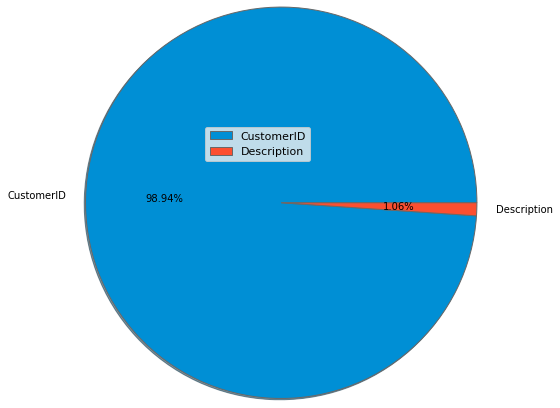

In [ ]:
plt.figure(figsize = (6, 3))
plt.pie(missing_perc[:2], labels = ["CustomerID", "Description"], 
        autopct = "%0.2f%%", 
        shadow = True, 
        radius = 3)
plt.legend(loc='upper left',
    prop={'size': 11})
plt.show() 

Pogledajmo kako izgledaju nedostajući podaci unutar skupa podataka:

In [ ]:
missing_desc = data.loc[data.Description.isnull()]
missing_desc

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


Iz prikaza vidimo kako podaci kod kojih je Description==NaN sadrže i druge neobične podatke:
- UnitPrice=0.0
- CustomerID=NaN 

Provjerimo sljedeće:

In [ ]:
data.loc[(data.Description.isnull()) & (data.CustomerID.isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


Broj nedostajućih podataka u stupcu 'Description' nam je otprije poznat i iznosi 1454, a ovdje također vidimo kako svakom podatku kojemu nedostaje vrijednost 'Description', ujedno nedostaje i vrijednost 'CustomerID'.

In [ ]:
missing_desc.UnitPrice.value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

Vidimo kako svakom podatku kojemu nedostaje vrijednost u stupcu 'Description', ujedno 'UnitPrice' iznosi 0.0

In [ ]:
data.loc[(data.Description.isnull()) & (data.CustomerID.isnull()) & (data.UnitPrice==0.0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


1454 retka nemaju vrijednost u stupcima 'Description' i 'CustomerID' te im je 'UnitPrice' 0.0.

Provjerile smo da broj redaka koji imaju Nan rijednosti u stupcima 'CustomerID' i 'Description' odgavara broju redaka koji imaju 0.0 vrijenost 'UnitPrice' i to je ono što smo i očekivale, stoga su ta 1454 zapisa nevažeća i sadrže vrijednosti koje nedostaju i netočne vrijednosti. Iz tih razloga odlučile smo potpuno ukloniti te podatke iz našeg dataseta.

Prije nego izbacimo podatke provjeravamo i sljedeće:

In [ ]:
data.loc[(data.CustomerID.isnull())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [ ]:
data[["Quantity", "UnitPrice"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0


 Min 'Quantity' i 'UnitPrice' su negativne, a osnovni razlog toga mogu biti odstupanja u skupu podataka.

Prikažimo sada početnu razdiobu podataka prije sređivanja:

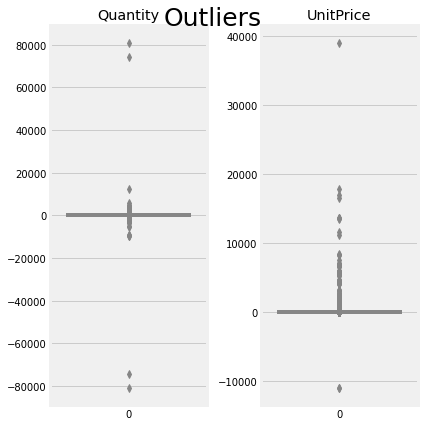

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=data['Quantity'], palette='Spectral').set_title("Quantity")
sns.boxplot(ax=axes[1], data=data['UnitPrice'], palette='Spectral').set_title("UnitPrice")

plt.tight_layout()

Primjetimo kako postoje odstupanja u skupu podataka (outlieri), te kako postoje negativne vrijednosti koje nam u ovom kontekstu ne odgovaraju uzmemo li u obzir što nam predstavljaju prikazane varijable. Dakle, 'Quantity' i 'UnitPrice' trebale bi prikazivati pozitivne vrijednosti ukoliko je narudžba ispravna (nije otkazana).

> **Ekstremne vrijednosti (Outlieri)** su opažanja koja su daleko izvan raspona većine podataka i mogu imati značajan utjecaj na rezultate statističkih analiza i modela strojnog učenja. U znanstvenom programiranju, outlieri mogu biti uzrokovani nizom čimbenika kao što su pogreške mjerenja, pogreške u unosu podataka ili prirodna varijabilnost podataka.
Outlieri mogu imati negativan učinak na izvedbu modela strojnog učenja pristranom modela prema outlierima i čineći ga manje robusnim za nove podatke. Također, mogu iskriviti rezultate statističkih analiza, što dovodi do netočnih zaključaka. Stoga je u znanstvenom programiranju važno identificirati i rukovati ekstremnim vrijednostima.

Ako se outlieri uklone, važno je dokumentirati proces i razlog zašto su uklonjeni jer bi to moglo utjecati na zaključke i tumačenje rezultata.

U statistici, kvartil je vrsta kvantila koji skup podataka dijeli na četiri jednaka dijela. Prvi kvartil (Q1) jednak je 25. percentilu i odvaja najnižih 25% podataka od ostalih. Drugi kvartil (Q2) jednak je medijanu i odvaja srednjih 50% podataka od gornjih i donjih 25%. Treći kvartil (Q3) jednak je 75. percentilu i odvaja najviših 25% podataka od ostalih.

In [ ]:
data.loc[data.CustomerID.isnull(), ["UnitPrice", "Quantity"]].describe().T

,count,mean,std,min,25%,50%,75%,max
UnitPrice,135080.0,8.076577,151.900816,-11062.06,1.63,3.29,5.45,17836.46
Quantity,135080.0,1.995573,66.696153,-9600.00,1.00,1.00,3.00,5568.00


Negativni podaci za 'UnitPrice' i 'Quantity' nalaze se među redcima koji nedostaju za ID kupca.

Iz gore prikazanog, te iz razloga što su nam u daljnoj analizi potrebni podaci koji sadrže 'CustomerID', odlučile smo se izbaciti sve nedostajuće vrijednosti iz skupa podataka.

In [ ]:
data = data.dropna()
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Nadalje, provjeravamo postoji li još pogrešnih vrijednosti u stupcu 'UnitPrice'.

In [ ]:
data[["Quantity", "UnitPrice"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0


Kao što možemo vidjeti iz tablice u skupu podataka još uvijek su neke cijene 0.0, što je pogrešno pa njih izostavljamo.

In [ ]:
data = data[data.UnitPrice != 0.0]
data[["Quantity", "UnitPrice"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406789.0,12.028359,247.927842,-80995.000,2.00,5.00,12.00,80995.0
UnitPrice,406789.0,3.460811,69.318561,0.001,1.25,1.95,3.75,38970.0


Nadalje, moramo se osvrnuti na saznanje da narudžbe mogu biti otkazane.  

Podsjetnik:
- InvoiceNo: Broj fakture, 6-znamenkasti broj jedinstveno dodijeljen svakoj transakciji. Ako ovaj kod počinje slovom 'c', označava otkazivanje.

Pronađimo otkazane narudžbe:

In [ ]:
data['canceled'] = list(map(lambda x: 'C' in str(x), data['InvoiceNo']))
canceled_orders = data[data['canceled'] == True]
canceled_orders.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,True


In [ ]:
display(canceled_orders[["Quantity", "UnitPrice"]].describe().T)
print("Oblik dataframa o otkazanim narudžbama" + "\n" + str(canceled_orders.shape))

,count,mean,std,min,25%,50%,75%,max
Quantity,8905.0,-30.859966,1170.154939,-80995.00,-6.00,-2.00,-1.00,-1.0
UnitPrice,8905.0,18.845519,444.366043,0.01,1.45,2.95,4.95,38970.0


Oblik dataframa o otkazanim narudžbama
(8905, 9)


Vidimo da postoji 8905 otkazanih narudžbi s negativnom vrijednosti stupca 'Quantity', a razlog može biti zbog nekog netočnog fakturiranja ili drugo.

Provjeravamo ima li dodatnih narudžbi s negativnom vrijednosti stupca 'Quantity':

In [ ]:
data[data['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,True
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,True
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,True
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,True
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,True


Iz svega gore navedenog vidimo kako su svih 8905 podataka koje sadrže negativnu vrijednost 'Quantity' ujedno i oni podaci kojima 'InvoiceNo' počinje sa 'c', pa zaključujemo da su to sve otkazane narudžbe koje ćemo izbaciti iz skupa podataka. 

Dakle, svejedno nam je izbacujemo li sve stupce čija je narudžba otkazana ili one kojima je vrijednost 'Quantity' negativna. Ovdje konkretno ostavljamo one kojima je vrijednost 'Quantity' pozitivna.

In [ ]:
data = data[data['Quantity'] > 0 ]
data[["Quantity", "UnitPrice"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,397884.0,12.988238,179.331775,1.000,2.00,6.00,12.00,80995.00
UnitPrice,397884.0,3.116488,22.097877,0.001,1.25,1.95,3.75,8142.75


Prikažimo sada grafički kako izgleda razdioba podataka:

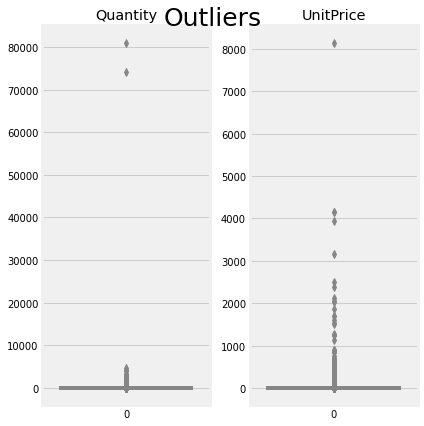

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(6,6))
fig.suptitle('Outliers\n', size = 25)

sns.boxplot(ax=axes[0], data=data['Quantity'], palette='Spectral').set_title("Quantity")
sns.boxplot(ax=axes[1], data=data['UnitPrice'], palette='Spectral').set_title("UnitPrice")

plt.tight_layout()

Primjetimo da su sada ostale pozitivne vrijednosti, te da nam razdioba podatka izgleda drugačije od početne. Također primjećujemo kako i dalje postoje outlieri koji u ovom kontekstu mogu nastati provođenjem velike narudžbe za slučaj 'Quantity', a kod 'UnitPrice' bi predstavljali neki iznimno skup proizvod.

Sada nastojimo vidjeti iz kojeg vremenskog perioda su podaci:

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

In [ ]:
data["Year"] = data['InvoiceDate'].dt.year
data["Month"] = data['InvoiceDate'].dt.strftime('%B')

In [ ]:
data["Year"].unique()

array([2010, 2011])

Vidimo da imamo dvije jedinstvene godine: 2010 i 2011

Provjerimo kojeg su oblika

In [ ]:
print("Oblik 2010:", data.loc[data["Year"]==2010].shape)
print("Oblik 2011:", data.loc[data["Year"]==2011].shape)

Oblik 2010: (26157, 11)
Oblik 2011: (371727, 11)


In [ ]:
data2010=data.loc[data["Year"]==2010]
data2011=data.loc[data["Year"]==2011]

In [ ]:
print(data2010["Month"].unique())
print(data2011["Month"].unique())

['December']
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


Vidimo da 2010 godina sadrži samo podatke za Prosinac, dok su za 2011 godinu saržani podaci za sve mjesece u godini te ćemo dalje u projektu koristiti isključivo te podatke.

Također, iz oblika podataka smo vidjele da puno više podataka ima za 2011. godinu što smo i prikazale na vizualizaciji koja slijedi.

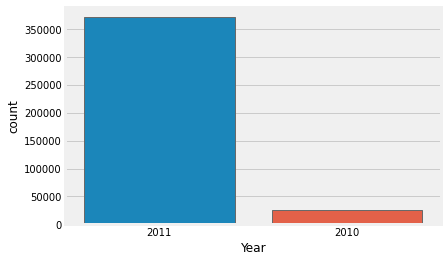

In [ ]:
sns.countplot(data=data, x='Year', order=data.Year.value_counts().index)

In [ ]:
#koristimo podatke za 2011 godinu
data=data2011

## **4. Analiza podataka**

Provjerimo sada raspodjelu narudžbi po državama.

In [ ]:
countries = data['Country'].value_counts(normalize=True)
#Ispis prvih 5
countries[:5]

United Kingdom    0.888768
Germany           0.022942
France            0.021271
EIRE              0.018570
Spain             0.006481
Name: Country, dtype: float64

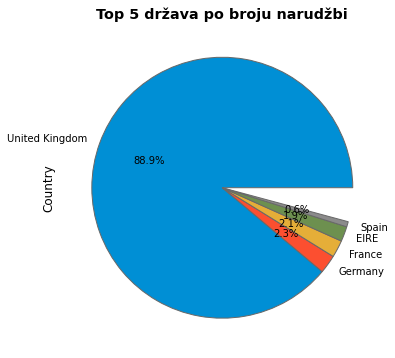

In [ ]:
plt.figure(figsize = (12, 6))
countries[:5].plot(kind = 'pie', autopct='%1.1f%%') 
plt.title('Top 5 država po broju narudžbi', weight='bold') 
plt.show()

Primjetimo kako dio nedostaje - to su ostale neprikazane države, obzirom da su uzeti postoci za prvih pet.

In [ ]:
data1 = dict(type='choropleth',
            locations = countries.index,
            locationmode = 'country names', z = countries,
            text = countries.index, colorbar = {'title':'Broj narudžbi'},
            reversescale = False)
layout = dict(title='Ukupan broj narudžbi po državama',
              geo = dict(showframe = True, projection={'type':'mercator'}),
              width=1200,
              height=1000)

#layout = dict(title='Ukupan broj narudžbi po državama',
#geo = dict(showframe = True, projection={'type':'mercator'}))
choromap = go.Figure(data = [data1], layout = layout)
iplot(choromap, validate=False)




Zaključak: Budući da se skup podataka odnosi na trgovinu sa sjedištem u Ujedinjenom Kraljevstvu, uobičajeno je da oko 90% narudžbi dolazi od tamo.


Provjeravamo broj kupaca:

In [ ]:
print("Ukupan broj kupaca:" + "\n" + str(data["CustomerID"].nunique()))

Ukupan broj kupaca:
4219


Provjeravamo ukupan broj narudžbi u skupu podataka:

In [ ]:
print("Ukupan broj narudžbi:",data['InvoiceNo'].nunique())

Ukupan broj narudžbi: 17132


Provjeravamo ukupan broj prodanih proizvoda:

In [ ]:
print("Ukupan broj prodanih proizvoda" + "\n" + str(data["StockCode"].nunique()))

Ukupan broj prodanih proizvoda
3596


Provjeravamo koji se proizvod najviše prodaje.

In [ ]:
most_sold = data.groupby(['StockCode'])['Quantity'].sum().reset_index()
most_sold = most_sold.sort_values(by=["Quantity"], ascending=False)

# Plotly bar plot
fig = px.bar(most_sold.head(10), x='StockCode', y='Quantity', color='Quantity', 
             text_auto='.2s',
             title = "Proizvod koji se najviše prodaje")
fig.update_yaxes(showgrid=False)
fig.update_xaxes(showgrid=False)
fig.update_layout(plot_bgcolor= 'white')

fig.show()

In [ ]:
display(data[data["StockCode"] == "23843"].head(1))
display(data[data["StockCode"] == "23166"].head(1))
display(data[data["StockCode"] == "84077"].head(1))
display(data[data["StockCode"] == "22197"].head(1))
display(data[data["StockCode"] == "85099B"].head(1))

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled,Year,Month
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,False,2011,December


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled,Year,Month
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,False,2011,January


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled,Year,Month
43687,540114,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,96,2011-01-05 09:44:00,0.29,15498.0,United Kingdom,False,2011,January


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled,Year,Month
42583,540013,22197,SMALL POPCORN HOLDER,19,2011-01-04 11:30:00,0.85,16255.0,United Kingdom,False,2011,January


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled,Year,Month
42486,539993,85099B,JUMBO BAG RED RETROSPOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,False,2011,January


Dakle, sljedećih 5 proizvoda se prodaje u najvećoj količini:
- PAPER CRAFT , LITTLE BIRDIE	
- MEDIUM CERAMIC TOP STORAGE JAR	
- WORLD WAR 2 GLIDERS ASSTD DESIGNS
- SMALL POPCORN HOLDER	
- JUMBO BAG RED RETROSPOT

Najprodavanije proizvode možemo dobiti i na sljedeći način:

- No, najprije je potrebno stvoriti novi stupac 'TotalPrice', odnosno ukupnu cijenu po transakciji dobivenu umnoškom jedinične cijene proizvoda i količinom.

In [ ]:
data['TotalPrice'] = data['UnitPrice'] * data['Quantity']

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled,Year,Month,TotalPrice
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,False,2011,January,19.5
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,False,2011,January,10.5
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,False,2011,January,10.5
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,False,2011,January,10.5
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,False,2011,January,12.5


In [ ]:
data['TotalPrice'].describe()

count    371727.000000
mean         22.432307
std         319.113318
min           0.001000
25%           4.950000
50%          11.900000
75%          19.800000
max      168469.600000
Name: TotalPrice, dtype: float64

> **Matrica korelacije** je tablica koja prikazuje koeficijente korelacije između više varijabli. Svaka ćelija u matrici sadrži koeficijent korelacije (r) između dvije varijable. Koeficijent korelacije mjeri snagu i smjer linearnog odnosa između dviju varijabli. Vrijednost koeficijenta korelacije kreće se od -1 do 1, gdje -1 označava savršen negativan linearni odnos, 1 označava savršen pozitivan linearni odnos, a 0 označava nepostojanje linearnog odnosa.

Dijagonala matrice je uvijek 1, jer je svaka varijabla u savršenoj korelaciji sama sa sobom. Korelacijska matrica može biti simetrična ili asimetrična ovisno o podacima i metodi koja se koristi za izračun korelacije.


Prikažimo sada matricu korelacije za numeričke podatke:

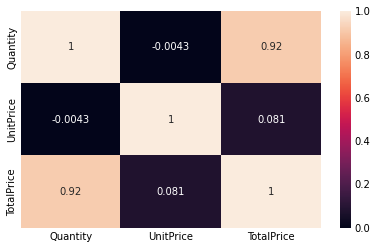

In [ ]:
corr_matrix = np.corrcoef(data[['Quantity', 'UnitPrice', 'TotalPrice']].values.T)
sns.heatmap(corr_matrix, annot=True, xticklabels=['Quantity', 'UnitPrice', 'TotalPrice'], yticklabels=['Quantity', 'UnitPrice', 'TotalPrice'])
plt.show()

Zaključimo:
- 'Quantity' i 'TotalPrice' su pozitivno korelirane, odnosno povećanjem jedne varijable povećat će se i druga (isto vrijedi i za smanjivanje)
- 'UnitPrice' i 'TotalPrice' nisu korelirane (broj blizu 0)
- 'Quantity' i 'UnitPrice' također nisu korelirane (broj blizu 0)

Možemo provjeriti koji proizvodi imaju najveću prodaju (obzirom na ukupnu cijenu) i u kojim državama:

Na ovo pitanje možemo odgovoriti grupiranjem podataka po proizvodu i zemlji i zbrajanjem ukupne prodaje za svaku grupu

Description                         Country       
PAPER CRAFT , LITTLE BIRDIE         United Kingdom    168469.60
REGENCY CAKESTAND 3 TIER            United Kingdom     94998.70
WHITE HANGING HEART T-LIGHT HOLDER  United Kingdom     85582.00
MEDIUM CERAMIC TOP STORAGE JAR      United Kingdom     80291.44
JUMBO BAG RED RETROSPOT             United Kingdom     73927.87
PARTY BUNTING                       United Kingdom     62441.43
ASSORTED COLOUR BIRD ORNAMENT       United Kingdom     49013.80
PICNIC BASKET WICKER 60 PIECES      United Kingdom     39619.50
CHILLI LIGHTS                       United Kingdom     39325.77
PAPER CHAIN KIT 50'S CHRISTMAS      United Kingdom     35872.33
Name: TotalPrice, dtype: float64


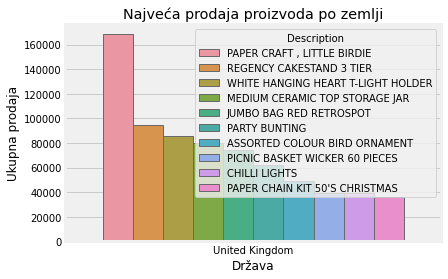

In [ ]:
product_sales_by_country = data.groupby(['Description', 'Country'])['TotalPrice'].sum()
print(product_sales_by_country.sort_values(ascending=False).head(10))

top_products = product_sales_by_country.sort_values(ascending=False).head(10).reset_index()
sns.barplot(x='Country', y='TotalPrice', hue='Description', data=top_products)
plt.title("Najveća prodaja proizvoda po zemlji")
plt.xlabel('Država')
plt.ylabel('Ukupna prodaja')
plt.show()

Provjeravamo koji su najpopularniji proizvodi po prodaji, neovisno o državi: 

Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              124836.25
WHITE HANGING HEART T-LIGHT HOLDER     90846.10
JUMBO BAG RED RETROSPOT                81601.58
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                73373.96
PARTY BUNTING                          68050.83
Manual                                 53551.76
ASSORTED COLOUR BIRD ORNAMENT          52914.23
RABBIT NIGHT LIGHT                     51346.20
Name: TotalPrice, dtype: float64


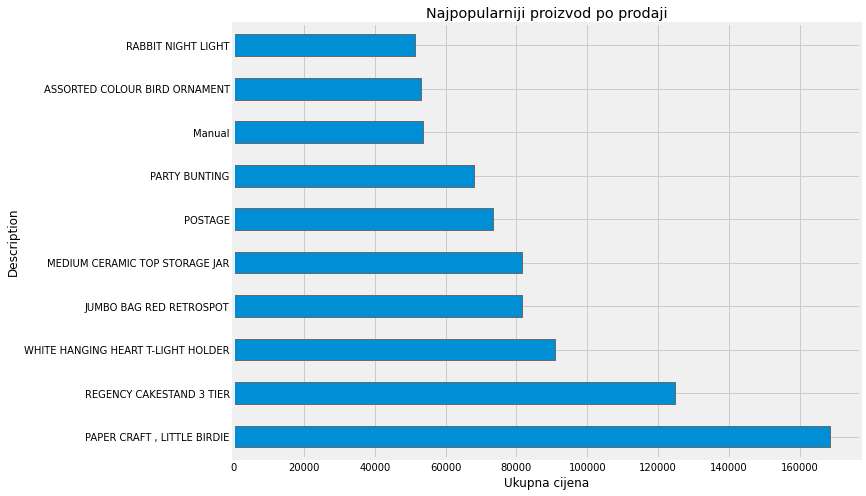

In [ ]:
product_sales = data.groupby('Description')['TotalPrice'].sum()

top_products = product_sales.sort_values(ascending=False).head(10)
print(top_products)

top_products.plot(kind='barh', figsize=(10, 8))
plt.title("Najpopularniji proizvod po prodaji")
plt.xlabel("Ukupna cijena")
plt.show()

Možemo zaključiti kako najprodavaniji proizvod možemo dobiti na više različitih načina ovisno kako grupiramo podatke i po kojem kriteriju uzimamo da je proizvod najprodavaniji.

Ono što svakako vidimo da je *PAPER CRAFT , LITTLE BIRDIE* najprodavaniji proizvod na koji god način ga tražili. 

Pogledajmo mjesečni prihod od prodaje svakog proizvoda kroz to vrijeme.

In [ ]:
PRODUCT_CODE = ""

if PRODUCT_CODE:
    invoices_product = data[data["StockCode"] == PRODUCT_CODE]
    month_sales = invoices_product.groupby(invoices_product['InvoiceDate'].dt.strftime('%B'))['Quantity', 'TotalPrice'].sum().reset_index()
    order_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    month_sales = month_sales.sort_values('InvoiceDate', key = lambda x : pd.Categorical(x, categories=order_months, ordered=True))
    plot_title = "Mjesečni prihod proizvoda: {} ".format(PRODUCT_CODE)
else:
    data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
    month_sales = data.groupby(data['InvoiceDate'].dt.strftime('%B'))['Quantity', 'TotalPrice'].sum().reset_index()
    order_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    month_sales = month_sales.sort_values('InvoiceDate', key = lambda x : pd.Categorical(x, categories=order_months, ordered=True))
    plot_title = "Mjesečni prihod proizvoda"


In [ ]:
# Plotly line chart 
fig = go.Figure()

fig.add_trace(go.Scatter(x=month_sales["InvoiceDate"], y=month_sales["TotalPrice"], name='TotalPrice',
                         line=dict(width=5)))
fig.update_layout(plot_bgcolor= 'white')

fig.update_layout(title_text=plot_title, 
                  title_font=dict(size=20, color="black", family="Arial"),
                  title_font_color="black")

fig.show()

Zaključak: 

*  Iz grafa je vidljivo kako prodaja raste kroz godinu, a najveća prodaja je u studenom.

*  Vidimo kako je prihod nestabilan kroz godinu:
  - naizmjence raste i pada u periodu od siječnja do svibnja, potom je od svibnja do kolovoza otprilike stalan s blagim padom
  - od kolovoza nadalje vidimo nagli rast do studenog
  - drastičan pad u prosincu (u odnosu na studeni)
* Uočavamo razliku veću od x2 između mjeseci s nižim i većim prihodom

Kako bi trgovina povećala poslovanje u ostalim mjesecima smatramo da bi trebala provesti plan za povećanje prodaje u istima.

Ideja bi bila pronalazak stalnih kupaca ili uvođenje novih proizvoda čija bi prodaja mogla biti cjelogodišnja. Također, prodaja bi se mogla povećati dobrom reklamnom kampanjom.

Pogledajmo kako su predmeti prodani u listopadu i studenome, provjeravamo stupac 'Description':

In [ ]:
data["Month"] = data['InvoiceDate'].dt.strftime('%B')
end_year = data.query("Month in ('November', 'October')")


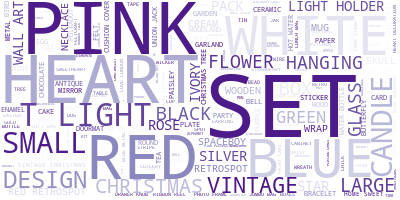

In [ ]:
text = end_year["Description"].unique()
text = " ".join(text)


wc = WordCloud(background_color="white",   
               max_words=2000,
               colormap='Purples_r',
               stopwords=STOPWORDS,        
               random_state=42)            


wc.generate(text)

fig = px.imshow(wc)
fig.show()

Zaključak: Možemo vidjeti uz razne boje, proizvode i slično da je prisutan i pojam "Božić" pa možemo pretpostaviti da je do povećane prodaje u studenome došlo radi predbožićnog vremena obzirom na to da se većina stanovnika UK izjašnjavaju kao kršćani.

Osim godišnje prodaje, zanima nas i prodaja po danu i satu.

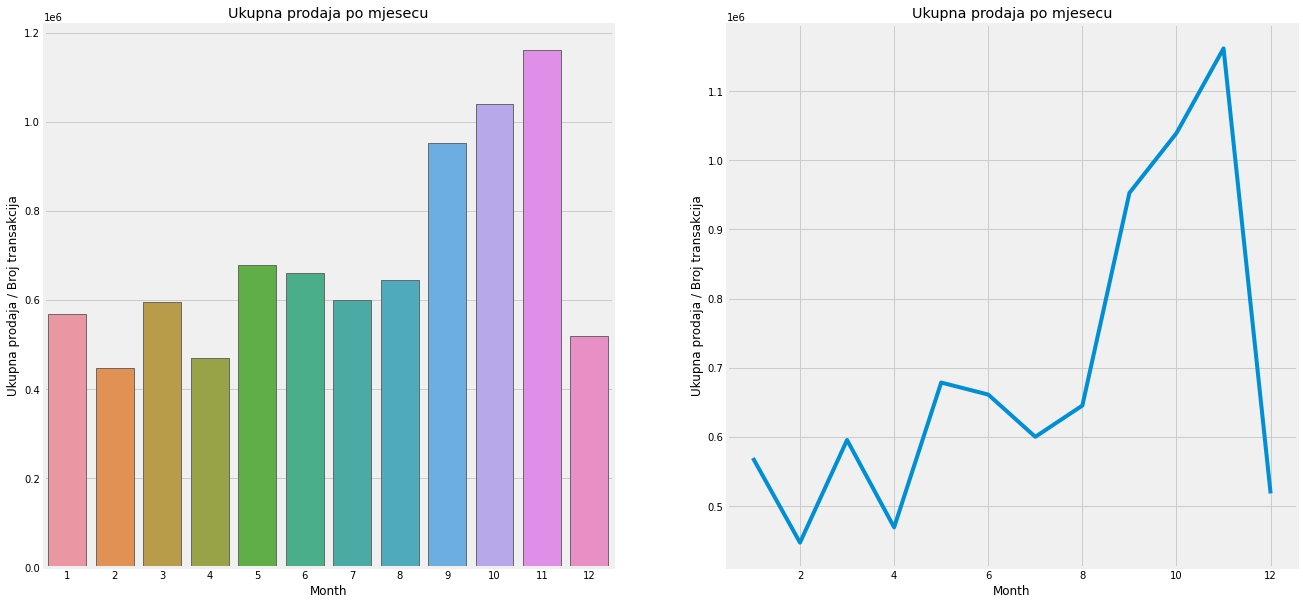

In [ ]:
dataCopy=data   

dataCopy['InvoiceDate'] = pd.to_datetime(dataCopy['InvoiceDate'])

# Grupiramo podatke po mjesecima i zbrajamo ukupnu prodaju za svaki mjesec
dataCopy['Month'] = dataCopy['InvoiceDate'].dt.month
total_sales_by_month = dataCopy.groupby('Month')['TotalPrice'].sum()

dataframes = [total_sales_by_month]

titles = ['Ukupna prodaja po mjesecu']

for dataCopy, title in zip(dataframes, titles):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
  sns.barplot(x=dataCopy.index, y=dataCopy.values, ax=ax1)
  ax1.set_title(title)

  ax1.set_ylabel('Ukupna prodaja / Broj transakcija')
  sns.lineplot(x=dataCopy.index, y=dataCopy.values, ax=ax2)
  ax2.set_title(title)

  ax2.set_ylabel('Ukupna prodaja / Broj transakcija')
plt.show()

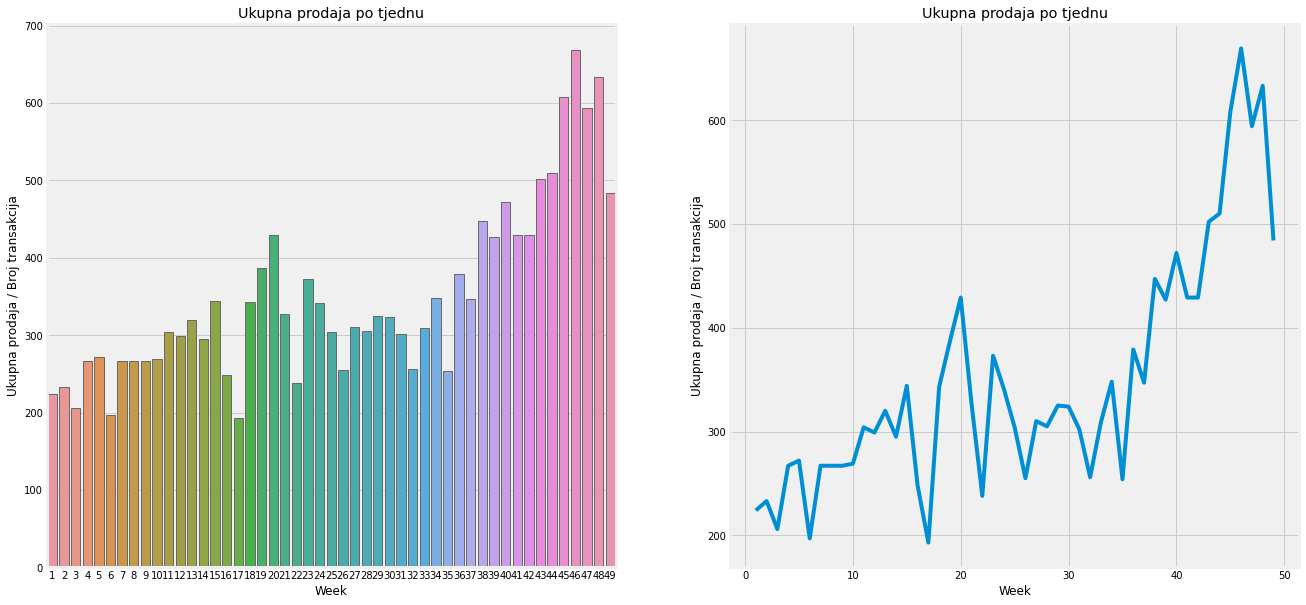

In [ ]:
dataCopy = data
dataCopy['InvoiceDate'] = pd.to_datetime(dataCopy['InvoiceDate'])
# Grupiramo podatke po tjednima i zbrajamo ukupnu prodaju za svaki tjedan
dataCopy['Week'] = dataCopy['InvoiceDate'].dt.week
total_sales_by_week = dataCopy.groupby('Week')['InvoiceNo'].nunique()

dataframes = [total_sales_by_week]

titles = ['Ukupna prodaja po tjednu']

for dataCopy, title in zip(dataframes, titles):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
  sns.barplot(x=dataCopy.index, y=dataCopy.values, ax=ax1)
  ax1.set_title(title)

  ax1.set_ylabel('Ukupna prodaja / Broj transakcija')
  sns.lineplot(x=dataCopy.index, y=dataCopy.values, ax=ax2)
  ax2.set_title(title)

  ax2.set_ylabel('Ukupna prodaja / Broj transakcija')
plt.show()

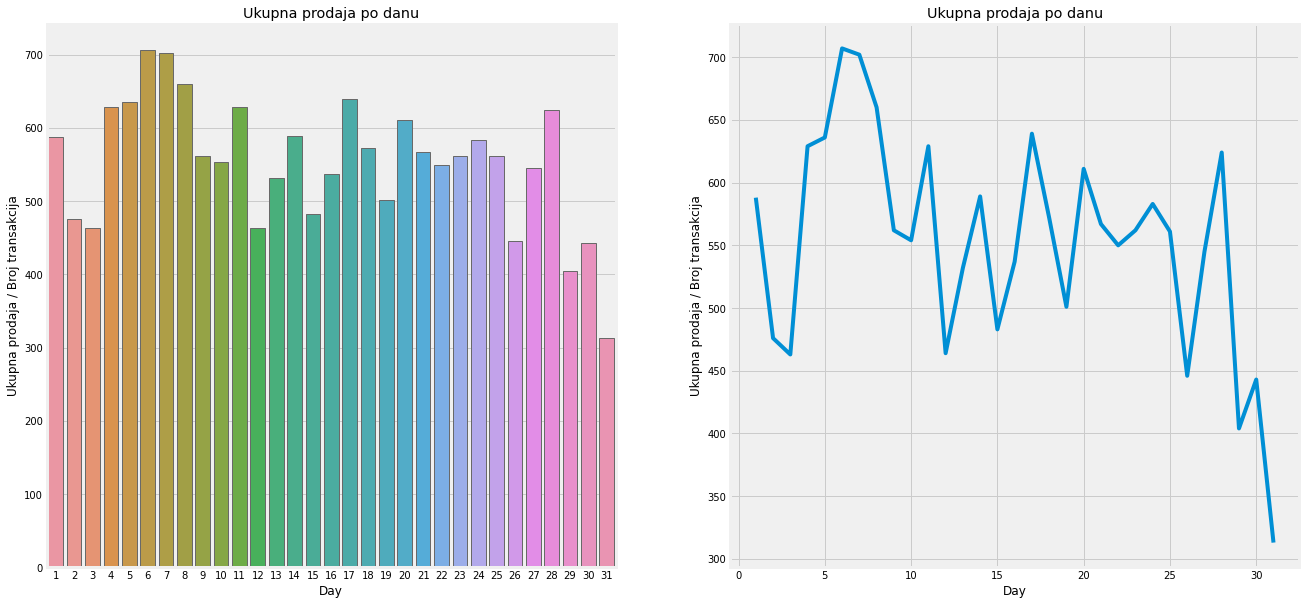

In [ ]:
dataCopy=data
dataCopy['InvoiceDate'] = pd.to_datetime(dataCopy['InvoiceDate'])
# Grupiramo podatke po danima i zbrajamo ukupnu prodaju za svaki dan
dataCopy['Day'] = dataCopy['InvoiceDate'].dt.day
total_sales_by_day = dataCopy.groupby('Day')['InvoiceNo'].nunique()

dataframes = [total_sales_by_day]

titles = ['Ukupna prodaja po danu']

for dataCopy, title in zip(dataframes, titles):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
  sns.barplot(x=dataCopy.index, y=dataCopy.values, ax=ax1)
  ax1.set_title(title)

  ax1.set_ylabel('Ukupna prodaja / Broj transakcija')
  sns.lineplot(x=dataCopy.index, y=dataCopy.values, ax=ax2)
  ax2.set_title(title)

  ax2.set_ylabel('Ukupna prodaja / Broj transakcija')
plt.show()

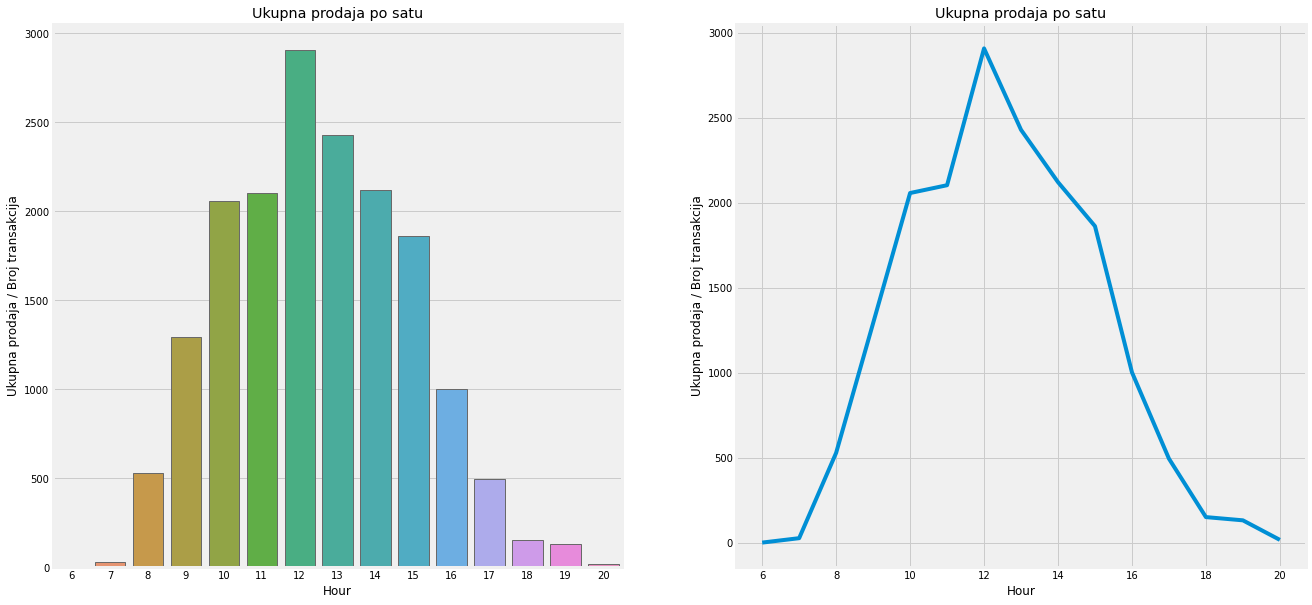

In [ ]:
dataCopy=data
dataCopy['InvoiceDate'] = pd.to_datetime(dataCopy['InvoiceDate'])
# Grupiramo podatke po satima i zbrajamo ukupnu prodaju za svaki sat
dataCopy['Hour'] = dataCopy['InvoiceDate'].dt.hour
total_sales_by_hour = dataCopy.groupby('Hour')['InvoiceNo'].nunique()

dataframes = [total_sales_by_hour]

titles = ['Ukupna prodaja po satu']

for dataCopy, title in zip(dataframes, titles):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
  sns.barplot(x=dataCopy.index, y=dataCopy.values, ax=ax1)
  ax1.set_title(title)

  ax1.set_ylabel('Ukupna prodaja / Broj transakcija')
  sns.lineplot(x=dataCopy.index, y=dataCopy.values, ax=ax2)
  ax2.set_title(title)

  ax2.set_ylabel('Ukupna prodaja / Broj transakcija')
plt.show()

Zaključak:
- Ukupna prodaja po mjesecu:
  - Iz grafa je vidljivo kako prodaja raste kroz godinu, a najveća prodaja je u studenom
  - Vidimo kako je prihod nestabilan kroz godinu:
    - naizmjence raste i pada u periodu od siječnja do svibnja, potom je od svibnja do kolovoza otprilike stalan s blagim padom
    - od kolovoza nadalje vidimo nagli rast do studenog
    - drastičan pad u prosincu (u odnosu na studeni)
    - Uočavamo razliku veću od x2 između mjeseci s nižim i većim prihodom

- Ukupna prodaja po tjednu:
  - ekvivalentna je onoj kroz godinu budući da se ovdje radi o kupovini po tjednima kroz godinu
  
- Ukupna prodaja po danu:
  - kupovina je najveća u danima početkom mjeseca, a opada u danima na kraju mjeseca

- Ukupna prodaja po satu:
  - Prodaja je najveća u 12 sati, a manja ujutro i navečer


Kao što je jasno vidljivo u prethodnim dijagramima, samo posljednji dijagram slijedi približno normalnu (Gaussovu) distribuciju. Smisao je u tome da stvari kada se mijenjaju, nastoje ostati u blizini točke prosjeka, pa se raspoređuju oko tog prosjeka po glatkoj, zvonolikoj krivulji. 
Kada je distribucija slična Gaussovoj, to znači da podaci slijede normalan obrazac, pri čemu je većina opažanja blizu srednje vrijednosti, a broj opažanja se smanjuje kako se udaljavate od srednje vrijednosti. Također, to znači da podaci nisu iskrivljeni ulijevo ili udesno i da nemaju odstupanja. To implicira da se podaci dobro ponašaju i da se mogu modelirati pomoću Gaussove distribucije, što znači da se mogu primijeniti mnoge statističke metode i modeli koji se temelje na Gaussovoj distribuciji. Međutim, vrijedno je napomenuti da distribucija može biti slična Gaussovoj distribuciji čak i ako nije potpuno ista. Mogao bi imati drugačiju srednju vrijednost ili standardnu ​​devijaciju, ili bi repovi mogli biti teži ili lakši. U tim se slučajevima kaže da je distribucija približno normalna ili da ima normalni oblik, kao što je u našem slučaju.

Sada ćemo grupirati podatke po zemlji i izračunati srednju ukupnu cijenu narudžbe za svaku državu te pravimo dijagram za vizualizaciju.

In [ ]:
country_group = data.groupby('Country')
mean_price_by_country = country_group['TotalPrice'].mean()
mean_price_by_country_sorted= mean_price_by_country.sort_values(ascending=False)
print(mean_price_by_country_sorted)

Country
Netherlands             120.971517
Australia               119.555183
Japan                   116.059766
Singapore                95.852658
Sweden                   81.280071
Denmark                  49.094000
Lebanon                  37.641778
EIRE                     37.191369
Brazil                   35.737500
Norway                   35.041472
Czech Republic           33.069600
Greece                   32.831172
Finland                  32.415090
Bahrain                  32.258824
Switzerland              30.769548
Israel                   29.119718
United Arab Emirates     27.974706
Channel Islands          27.478673
Austria                  25.439692
France                   25.219140
Germany                  25.049953
Spain                    24.795924
Malta                    24.335625
Canada                   24.280662
Iceland                  23.829205
Italy                    23.219694
Portugal                 23.031144
Cyprus                   22.598041
Poland      

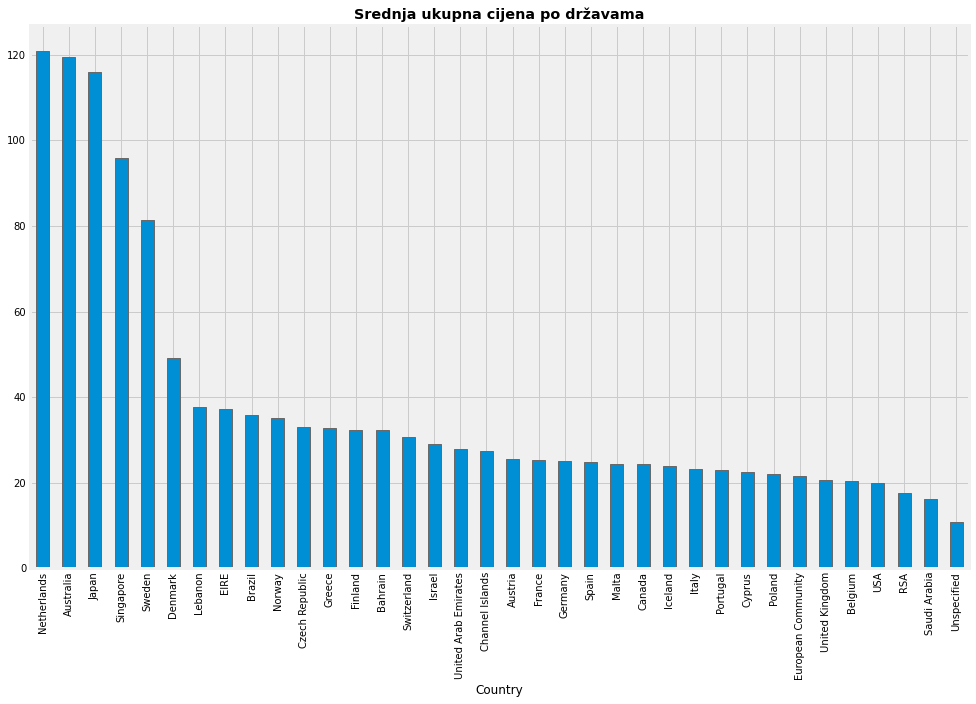

In [ ]:
plt.figure(figsize = (15, 10))
mean_price_by_country_sorted.plot(kind='bar')
plt.title('Srednja ukupna cijena po državama', weight='bold') 
plt.show()

Vidimo kako je srednja ukupna cijena narudžbe najveća za narudžbe iz Nizozemske, a izuzmemo li 'Unspecified' najmanja srednja ukupna cijena narudžbe je za narudžbe iz Saudijske Arabije.

Provjeravamo koja je prosječna vrijednost transakcije i prosječna količina po transakciji i kako se razlikuju po državama:

In [ ]:
mean_price_by_country = data.groupby('Country')['TotalPrice'].mean()
mean_quantity_by_country = data.groupby('Country')['Quantity'].mean()
print("Srednja vrijednost transakcije po državama:")
print(mean_price_by_country.sort_values(ascending=False).head(10))
print("Srednja vrijednost količine proizvoda po transakciji po državama:")
print(mean_quantity_by_country.sort_values(ascending=False).head(10))

Srednja vrijednost transakcije po državama:
Country
Netherlands    120.971517
Australia      119.555183
Japan          116.059766
Singapore       95.852658
Sweden          81.280071
Denmark         49.094000
Lebanon         37.641778
EIRE            37.191369
Brazil          35.737500
Norway          35.041472
Name: TotalPrice, dtype: float64
Srednja vrijednost količine proizvoda po transakciji po državama:
Country
Japan             85.636719
Netherlands       84.630520
Sweden            75.597647
Australia         72.551304
Czech Republic    26.840000
Singapore         23.608108
Denmark           21.613889
EIRE              19.561350
Canada            18.298013
Norway            17.049784
Name: Quantity, dtype: float64


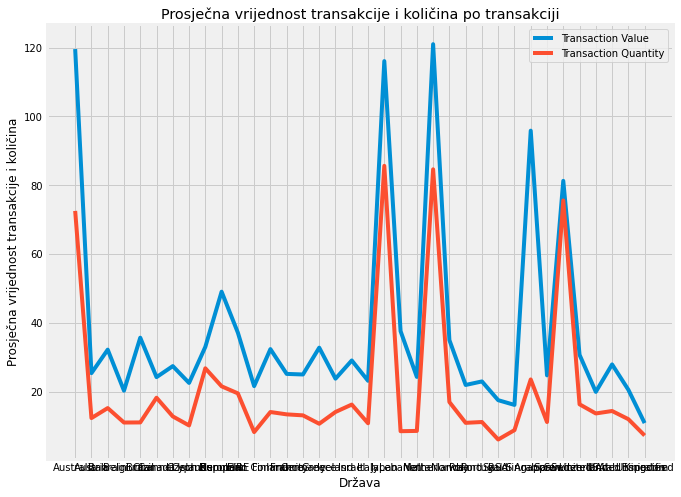

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(x=mean_price_by_country.index, y=mean_price_by_country.values, label='Transaction Value')
sns.lineplot(x=mean_quantity_by_country.index, y=mean_quantity_by_country.values, label='Transaction Quantity')
plt.title("Prosječna vrijednost transakcije i količina po transakciji")
plt.xlabel('Država')
plt.ylabel('Prosječna vrijednost transakcije i količina')
plt.show()

Očekivano, većom količinom proizvoda po transakciji veća je i ukupna cijena transakcije.

Gledajući prvih 10 država uočavamo:
- Država s najvećim prosječnim iznosom transakcije je Nizozemska, a država s najmanjim je Norveška.
- Država s najvećim prosječnim brojem proizvoda po transakciji je Japan, a sa najmanjim je Norveška.

Zanimljivo je uočiti kako je Japan treći na listi po srednjoj vrijednosti transakcije, a prvi po prosječnom broju proizvoda po transkaciji. Možemo pretpostaviti kako u Japanu se kupuje količinski više cjenovno jeftinijih proizvoda, no tu bi tezu naravno trebalo provjeriti.

Gledamo kako se broj transakcija i ukupna prodaja razlikuju po državama (uzimamo prvih 10):

Na ovo pitanje možemo odgovoriti grupiranjem podataka po državi i brojanjem broja transakcija te zbrajanjem ukupne prodaje za svaku državu.

Country
United Kingdom    15355
Germany             427
France              368
EIRE                245
Belgium              93
Netherlands          91
Spain                86
Australia            54
Portugal             51
Switzerland          49
Name: InvoiceNo, dtype: int64
Country
United Kingdom    6809729.704
Netherlands        276661.860
EIRE               256732.020
Germany            213626.000
France             199407.740
Australia          137488.460
Spain               59733.380
Switzerland         55139.030
Belgium             39386.430
Sweden              34544.030
Name: TotalPrice, dtype: float64


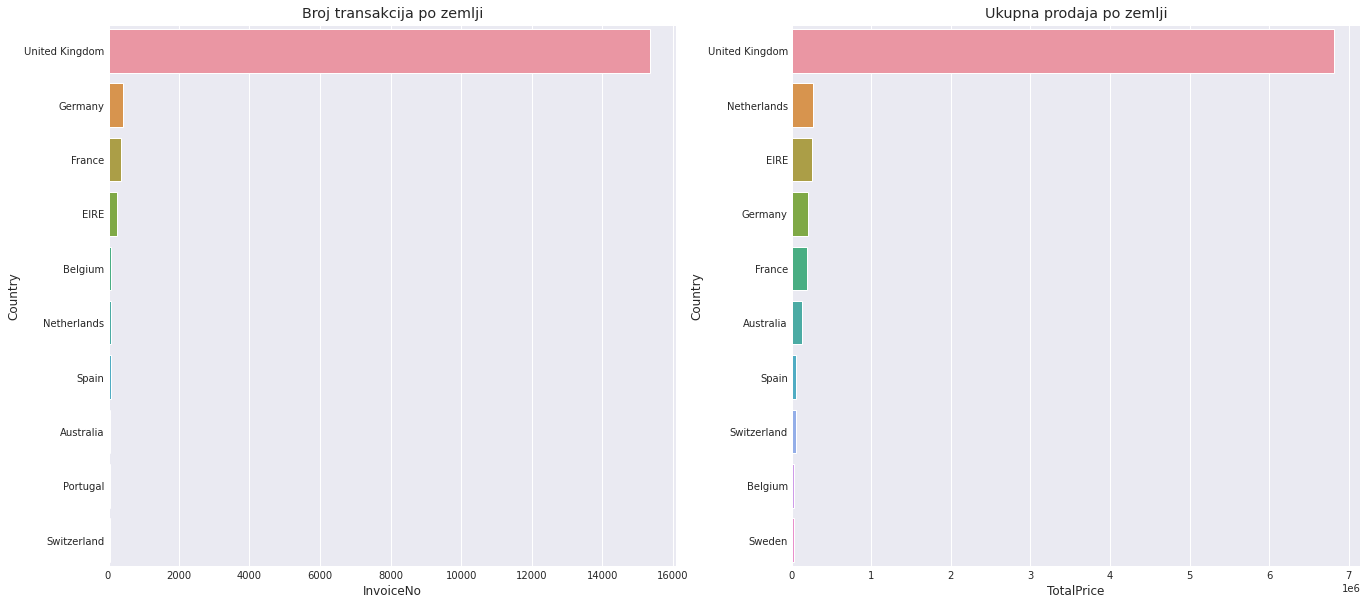

In [ ]:
num_transactions_by_country = data.groupby('Country')['InvoiceNo'].nunique()
total_sales_by_country = data.groupby('Country')['TotalPrice'].sum()

print(num_transactions_by_country.sort_values(ascending=False).head(10))
print(total_sales_by_country.sort_values(ascending=False).head(10))

sns.set_style("darkgrid")

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

sns.barplot(x=num_transactions_by_country.sort_values(ascending=False).head(10), y=num_transactions_by_country.sort_values(ascending=False).head(10).index, ax=ax[0], orient='h')
ax[0].set_title("Broj transakcija po zemlji")

sns.barplot(x=total_sales_by_country.sort_values(ascending=False).head(10), y=total_sales_by_country.sort_values(ascending=False).head(10).index, ax=ax[1], orient='h')
ax[1].set_title("Ukupna prodaja po zemlji")

plt.show()

Očekivano (obzirom na sjedište u UK), prva zemlja je u broju transkacija i ukupnoj prodaji je Ujedinjeno Kraljevstvo.

Ostale države su daleko ispod i po broju transkacija i po ukupnoj potrošnji od Ujedinjenog Kraljevstva.

Mjesečni prosječni broj faktura:

In [ ]:
invoice_number = data.groupby(['InvoiceNo', 'Month']).size().reset_index(name='average')
monthly_invoice_number = invoice_number.groupby(['Month'])['average'].mean().reset_index()
monthly_invoice_number['average']  = monthly_invoice_number.average.round()
monthly_invoice_number.head()

,Month,average
0,1,22.0
1,2,20.0
2,3,21.0
3,4,20.0
4,5,18.0


In [ ]:
order_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_invoice_number = monthly_invoice_number.sort_values('Month', key = lambda x : pd.Categorical(x, categories=order_months, ordered=True))

# Plotly line chart 
fig = go.Figure()

fig.add_trace(go.Scatter(x=monthly_invoice_number["Month"], y=monthly_invoice_number["average"], 
                         line=dict(width=5)))
fig.update_layout(plot_bgcolor= 'white')

fig.update_layout(title_text="Mjesečni prosječni broj faktura", 
                  title_font=dict(size=20, color="black", family="Arial"),
                  title_font_color="black")

fig.show()

Sljedeće što nas zanima je tko su najvjerniji klijenti?

In [ ]:
top_customer_all = data.groupby(['CustomerID'])['Quantity', 'TotalPrice'].sum().reset_index()
top_customer_sorted_r = top_customer_all.sort_values(by=["TotalPrice"], ascending=False)

top_customer_revenue = top_customer_sorted_r.head(10)

In [ ]:
fig = px.bar(top_customer_revenue, x="TotalPrice", y="CustomerID",
             text_auto='.2s', orientation='h',
             title = "Najvjerniji kupci prema ukupnoj prodanoj cijeni proizvoda")
fig.update_yaxes(type='category')
fig.update_xaxes(showgrid=False)
fig.update_layout(plot_bgcolor= 'white', yaxis=dict(autorange="reversed"))

fig.show()

## **5. Segmentacija kupaca**

Svi kupci imaju različite vrste potreba. Uz povećanje baze kupaca i transakcija, nije lako razumjeti zahtjeve svakog kupca. Identificiranje potencijalnih kupaca može poboljšati marketinšku kampanju, što u konačnici povećava prodaju. Segmentacija može igrati bolju ulogu u grupiranju tih kupaca u različite segmente.

Segmentacija kupaca je kada cijelu bazu kupaca podijelimo u pojedinačne grupe, ovisno o specifičnim osobinama ili navikama kupnje koje im mogu biti zajedničke.
Segmentacija kupaca znatno olakšava personalizaciju marketinških poruka kako bi se osigurale najbolje moguće stope otvaranja, stope konverzije i ponovljene kupnje.

Različitim segmentima kupaca mogu se poslati različiti marketinški sadržaji kako bi im se pomoglo da se osjećaju cijenjenima i shvaćenima te kako bi se povećala lojalnost kupaca.

### **Zbog čega radimo segmentaciju kupaca?**
📌 Pomoći će u identificiranju najpotencijalnijih kupaca.

📌 Pomoći će menadžerima da lakše komuniciraju s ciljanom skupinom publike.

📌 Također, pomoć u odabiru najboljeg medija za komunikaciju s ciljanim segmentom.

📌 Poboljšava kvalitetu usluge, lojalnost i zadržavanje.

📌 Poboljšava odnos s klijentima kroz bolje razumijevanje potreba segmenata.

📌 Pomoći će menadžerima da osmisle posebne ponude za ciljane kupce, kako bi ih potaknuli da kupuju više proizvoda.

📌 Također pomaže u prepoznavanju novih proizvoda za koje bi kupci mogli biti zainteresirani.


### Provodimo RFM analizu

RFM (Recency, Frequency, Monetary) analiza je pristup koji se temelji na ponašanju i grupira kupce u segmente. Grupira kupce na temelju njihovih prethodnih kupovnih transakcija. Koliko nedavno, koliko često i koliko je kupac kupio. RFM filtrira kupce u različite skupine u svrhu bolje usluge. Pomaže menadžerima da identificiraju potencijalne kupce kako bi poslovali unosnije. Postoji segment kupaca koji je veliki potrošač, ali što ako su kupili samo jednom ili koliko nedavno su kupili? Kupuju li često naš proizvod? Također, pomaže menadžerima da vode učinkovitu promotivnu kampanju za personaliziranu uslugu.

* Posljednja pojava (Recency): Tko je nedavno kupio? Broj dana od zadnje kupnje (najmanja kupnja)
* Učestalost (Frequency): Tko je često kupovao? To znači ukupan broj kupnji. ( visoka frekvencija)
* Novčana vrijednost (Monetary): Tko ima visok iznos kupovine? To znači ukupan novac koji je korisnik potrošio (visoka novčana vrijednost)

Koraci RFM-a:
*  (Posljednja pojava, Učestalost, Novčana vrijednost): Računamo posljednju pojavu, učestalost i novčane vrijednosti za svakog kupca.
*  Dodajemo vrijednosti bin segmenta u RFM tablicu pomoću kvartila.
*  Poredamo RFM rezultat korisnika uzlaznim redoslijedom.

Obzirom da su nam bitni podaci od prve kupnje, radit ćemo sa podacima iz 2010. i 2011. godine:

In [ ]:
data = pd.concat([data2010, data2011])
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled,Year,Month,TotalPrice,Week,Day,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,2010,December,NaN,NaN,NaN,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010,December,NaN,NaN,NaN,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,2010,December,NaN,NaN,NaN,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010,December,NaN,NaN,NaN,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,2010,December,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,False,2011,12,10.20,49.0,9.0,12.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,False,2011,12,12.60,49.0,9.0,12.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,False,2011,12,16.60,49.0,9.0,12.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,False,2011,12,16.60,49.0,9.0,12.0


In [ ]:
pd.DataFrame([{'products': len(data['StockCode'].value_counts()),    
               'transactions': len(data['InvoiceNo'].value_counts()),
               'customers': len(data['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3665,18532,4338


Vidljivo je da se podaci odnose na 4338 korisnika te da su kupili 3665 različita proizvoda. Ukupan broj izvršenih transakcija ~ 18500.

Sada ćemo odrediti broj proizvoda kupljenih u svakoj transakciji:

In [ ]:
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket[:10].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12347.0,537626,31
2,12347.0,542237,29
3,12347.0,549222,24
4,12347.0,556201,18
5,12347.0,562032,22
6,12347.0,573511,47
7,12347.0,581180,11
8,12348.0,539318,17
9,12348.0,541998,6


In [ ]:
display(data.sort_values('CustomerID')[:5])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,canceled,Year,Month,TotalPrice,Week,Day,Hour
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,False,2011,1,77183.60,3.0,18.0,10.0
286637,562032,22423,REGENCY CAKESTAND 3 TIER,3,2011-08-02 08:48:00,12.75,12347.0,Iceland,False,2011,8,38.25,31.0,2.0,8.0
72274,542237,84558A,3D DOG PICTURE PLAYING CARDS,12,2011-01-26 14:30:00,2.95,12347.0,Iceland,False,2011,1,35.40,4.0,26.0,14.0
72273,542237,21731,RED TOADSTOOL LED NIGHT LIGHT,12,2011-01-26 14:30:00,1.65,12347.0,Iceland,False,2011,1,19.80,4.0,26.0,14.0
72272,542237,22497,SET OF 2 TINS VINTAGE BATHROOM,4,2011-01-26 14:30:00,4.25,12347.0,Iceland,False,2011,1,17.00,4.0,26.0,14.0


Lociramo unose koji označavaju negativnu količinu i provjeravamo postoji li sustavno narudžba koja ukazuje na istu količinu (ali pozitivnu), s istim opisom (CustomerID, Description i UnitPrice):

In [ ]:
df_check = data[data['Quantity'] < 0][['CustomerID','Quantity','StockCode','Description','UnitPrice']]
for index, col in  df_check.iterrows():
    if data[(data['CustomerID'] == col[0]) & (data['Quantity'] == -col[1]) 
                & (data['Description'] == col[2])].shape[0] == 0: 
        print(df_check.loc[index])
        print(15*'-'+'>'+' HYPOTHESIS NOT FULFILLED')
        break

Budući da iz "Ujedinjenog Kraljevstva" dolazi većina klijenata, odlučile smo filtrirati podatke i raditi za klijente u Ujedinjenom Kraljevstvu.

In [ ]:
data_uk = data[data.Country=='United Kingdom']

In [ ]:
data_uk[["Quantity", "UnitPrice", "TotalPrice"]].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,354321.0,12.013795,189.267956,1.000,2.00,4.00,12.00,80995.00
UnitPrice,354321.0,2.963994,17.862655,0.001,1.25,1.95,3.75,8142.75
TotalPrice,330379.0,20.611872,337.049387,0.001,4.16,10.20,17.70,168469.60


> Kupci s najnižom učestalošću, najvećom učestalošću i novčanim iznosima smatraju se vrhunskim kupcima.

In [ ]:
CURRENT_DATE_CHOOSEN = datetime.datetime(2011,12,10)
rfm= data_uk.groupby('CustomerID').agg({'InvoiceDate': lambda date: (CURRENT_DATE_CHOOSEN - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})
rfm.columns=['monetary','recency','frequency']

In [ ]:
rfm.head()

,monetary,recency,frequency
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,3489.74
12748.0,0,4595,29491.60
12749.0,3,199,4090.88
12820.0,3,59,942.34


**Kvantili** su skup vrijednosti/točaka koji skup podataka dijeli u grupe jednake veličine. 

> **qcut()**:
je diskretizacijska funkcija temeljena na kvantilu. qcut() sprema podatke na temelju kvantila uzorka.

In [ ]:
rfm['r_quantile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quantile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quantile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])


Kombiniramo sva tri kvantila u jednom stupcu: 

In [ ]:
rfm['rfm_score'] = rfm.r_quantile.astype(str)+ rfm.f_quantile.astype(str) + rfm.m_quantile.astype(str)
rfm.head()

,monetary,recency,frequency,r_quantile,f_quantile,m_quantile,rfm_score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,1,111
12747.0,2,103,3489.74,4,1,4,414
12748.0,0,4595,29491.60,4,1,4,414
12749.0,3,199,4090.88,4,1,4,414
12820.0,3,59,942.34,3,2,4,324


Filtriramo najbolje kupce: 

In [ ]:
rfm[rfm['rfm_score']=='111'].sort_values('monetary', ascending=False).head()

,monetary,recency,frequency,r_quantile,f_quantile,m_quantile,rfm_score
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,1,111
15749.0,235,10,44534.30,1,1,1,111
16698.0,226,5,1998.00,1,1,1,111
13135.0,196,1,3096.00,1,1,1,111
14828.0,196,17,2139.76,1,1,1,111


Tko su vjerni kupci?
> Kupci s visokom frekvencijskom vrijednošću

In [ ]:
rfm[rfm['f_quantile'] >= '3' ].sort_values('monetary', ascending=False).head()

,monetary,recency,frequency,r_quantile,f_quantile,m_quantile,rfm_score
CustomerID,,,,,,,
15464.0,338,157,1048.85,4,2,1,421
15649.0,336,2,306.00,1,3,1,131
15326.0,333,29,311.71,2,3,1,231
16850.0,333,19,332.41,2,3,1,231
17406.0,333,113,1498.32,4,2,1,421


### **5.1. Uvid u kategorije proizvoda**

Opis proizvoda

Kao prvi korak, izdvajamo iz varijable 'Description' informacije koje će se pokazati korisnima. Da bismo to učinile, koristimo sljedeću funkciju:

In [ ]:
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  
    keywords_select = dict()  
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Broj ključnih riječi u varijabli '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

In [ ]:
df_initial=data.copy()

In [ ]:
df_cleaned = data.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df_initial.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df_initial[(df_initial['CustomerID'] == col['CustomerID']) &
                         (df_initial['StockCode']  == col['StockCode']) & 
                         (df_initial['InvoiceDate'] < col['InvoiceDate']) & 
                         (df_initial['Quantity']   > 0)].copy()

    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)

    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
        
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break  

Ova funkcija kao ulaz uzima skup podataka i analizira sadržaj stupca 'Description' izvodeći sljedeće operacije:

*  izdvajamo imena (vlastita, uobičajena) koja se pojavljuju u opisu proizvoda
*  za svako ime izdvajamo korijen riječi i skupljamo skup imena povezanih s tim određenim korijenom
*  brojimo koliko se puta svaki korijen pojavljuje u dataframeu
*  kada je nekoliko riječi navedeno za isti korijen, smatramo da je ključna riječ, povezana s tim korijenom, najkraći naziv (ovo sustavno odabire jedninu kada postoje varijante jednine/množine)


Prvi korak analize je dohvaćanje popisa proizvoda:

In [ ]:
df_produits = pd.DataFrame(df_initial['Description'].unique()).rename(columns = {0:'Description'})

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_produits)

Broj ključnih riječi u varijabli 'Description': 1477


Izvršenje ove funkcije vraća tri varijable:

*  *keywords*: popis izdvojenih ključnih riječi
*  *keywords_roots*: rječnik gdje su ključevi korijeni ključnih riječi, a vrijednosti su popisi riječi povezanih s tim korijenima
*  *count_keywords*: rječnik koji ispisuje koliko je puta svaka riječ korištena


U ovom trenutku pretvaramo rječnik count_keywords u popis kako bi sortirale ključne riječi prema njihovom pojavljivanju:

In [ ]:
list_products = []
for k,v in count_keywords.items():
    list_products.append([keywords_select[k],v])
list_products.sort(key = lambda x:x[1], reverse = True)

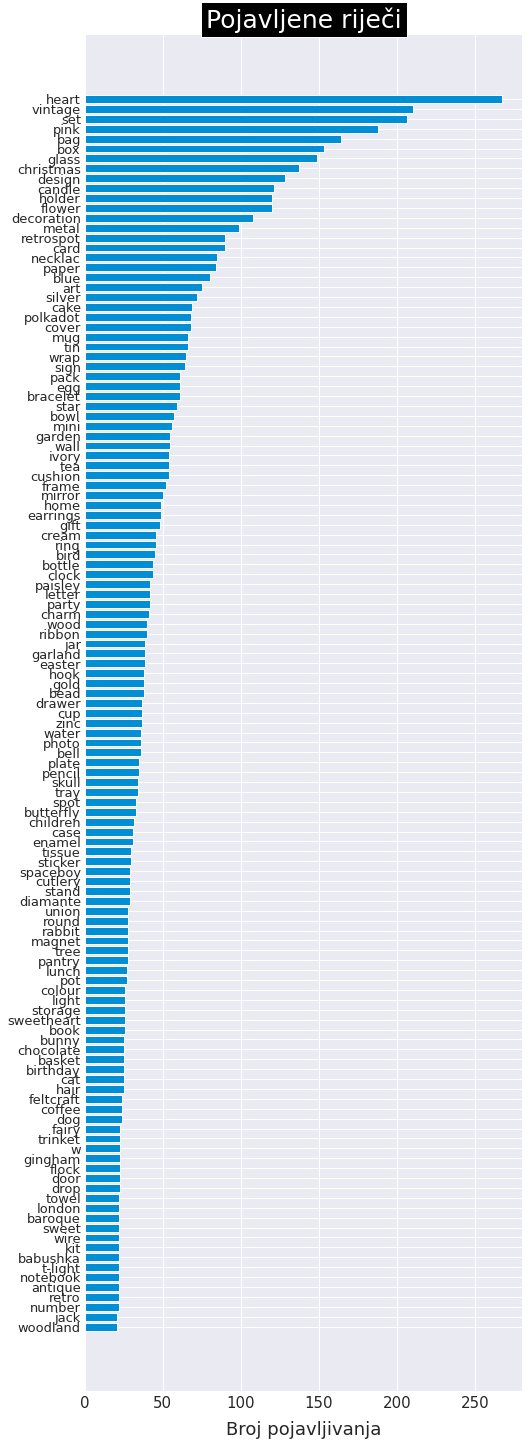

In [ ]:
liste = sorted(list_products, key = lambda x:x[1], reverse = True)
plt.rc('font', weight='normal')
fig, ax = plt.subplots(figsize=(7, 25))
y_axis = [i[1] for i in liste[:125]]
x_axis = [k for k,i in enumerate(liste[:125])]
x_label = [i[0] for i in liste[:125]]
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 13)
plt.yticks(x_axis, x_label)
plt.xlabel("Broj pojavljivanja", fontsize = 18, labelpad = 10)
ax.barh(x_axis, y_axis, align = 'center')
ax = plt.gca()
ax.invert_yaxis()
plt.title("Pojavljene riječi",bbox={'facecolor':'k', 'pad':5}, color='w',fontsize = 25)
plt.show()

Dobiveni popis sadrži više od 1400 ključnih riječi, a one najčešće se pojavljuju u više od 200 proizvoda. No, proučavajući sadržaj popisa, primjećujemo da su neka imena beskorisna. Neke ne nose informacije, poput boja. Stoga izbacujemo ove riječi iz analize koja slijedi i također odlučujemo uzeti u obzir samo riječi koje se pojavljuju više od 13 puta jer su to najučestaliji pojmovi.

In [ ]:
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])
#______________________________________________________    
list_products.sort(key = lambda x:x[1], reverse = True)
print('Sačuvane riječi:', len(list_products))

Sačuvane riječi: 191


In [ ]:
df_cleaned=data.copy()
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = [] ; doubtfull_entry = []

for index, col in  df_initial.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = df_initial[(df_initial['CustomerID'] == col['CustomerID']) &
                         (df_initial['StockCode']  == col['StockCode']) & 
                         (df_initial['InvoiceDate'] < col['InvoiceDate']) & 
                         (df_initial['Quantity']   > 0)].copy()
                         
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)

    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        

    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break  

In [ ]:
liste_produits = df_cleaned['Description'].unique()
X = pd.DataFrame()
for key, occurence in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), liste_produits))

X označava riječi sadržane u opisu proizvoda korištenjem načela one-hot-encoding. Uvođenje raspona cijena rezultira uravnoteženijim grupama u smislu broja elemenata. Stoga ovoj matrici dodajemo 6 dodatnih stupaca, gdje označavamo raspon cijena proizvoda:

In [ ]:
threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    label_col.append(col)
    X.loc[:, col] = 0

for i, prod in enumerate(liste_produits):
    prix = df_cleaned[ df_cleaned['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

Za odabir odgovarajućeg asortimana, provjeravamo broj proizvoda u različitim grupama:

In [ ]:
print("{:<8} {:<20} \n".format('gamme', 'nb. produits') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

gamme    nb. produits         
--------------------
0<.<1       965                 
1<.<2       1007                
2<.<3       674                 
3<.<5       608                 
5<.<10      468                 
.>10        155                 


#### Kreiranje klastera za proizvode

Grupiramo proizvode u različite klase. U slučaju matrica s binarnim kodiranjem, najprikladnija metrika za izračun udaljenosti je Hammingova metrika. Kmeans metoda sklearn koristi euklidsku udaljenost koja se može koristiti, ali nije najbolji izbor u slučaju kategoričkih varijabli. Međutim, kako bismo upotrijebili Hammingovu metriku, trebamo upotrijebiti paket kmodes koji nije dostupan na trenutnoj platformi. Stoga koristimo kmeans metodu, čak i ako to nije najbolji izbor.

Kako bi definirale, približno, broj klastera koji najbolje predstavljaju podatke, koristimo ocjenu siluete:

In [ ]:
matrix = X.to_numpy()
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("Za n_clustera =", n_clusters, "Prosječni silhouette_score je:", silhouette_avg)

Za n_clustera = 3 Prosječni silhouette_score je: 0.10205321548796767
Za n_clustera = 4 Prosječni silhouette_score je: 0.12605702964207235
Za n_clustera = 5 Prosječni silhouette_score je: 0.14636824001225393
Za n_clustera = 6 Prosječni silhouette_score je: 0.1440930387103721
Za n_clustera = 7 Prosječni silhouette_score je: 0.143727893712148
Za n_clustera = 8 Prosječni silhouette_score je: 0.14775988090887113
Za n_clustera = 9 Prosječni silhouette_score je: 0.13035466963106324


U praksi se gore dobiveni rezultati mogu smatrati ekvivalentnima budući da će se, ovisno o izvođenju, rezultati od 0,1±0,05 dobiti za sve klastere s n_klastera > 3 (dobivamo nešto niže rezultate za prvi klaster). S druge strane, osim 5 klastera, neki klasteri sadrže vrlo malo elemenata. Stoga sam odlučile odvojiti skup podataka u 5 klastera. Kako bismo osigurale dobru klasifikaciju pri svakom pokretanju bilježnice, ponavljamo sve dok ne dobijemo najbolju moguću ocjenu siluete, koja je, u ovom slučaju, oko 0,15:

In [ ]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg < 0.145:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    
    print("Za n_clustera =", n_clusters, "Prosječni silhouette_score je:", silhouette_avg)

Za n_clustera = 5 Prosječni silhouette_score je: 0.14627923074407068


In [ ]:
#Provjeravamo broj elemenata u svakoj klasi
pd.Series(clusters).value_counts()

4    1114
1    1007
2     674
3     608
0     474
dtype: int64

Kako bismo imale uvid u kvalitetu klasifikacije, možemo prikazati rezultate silueta svakog elementa različitih klastera. 

In [ ]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = cm.get_cmap("Spectral")
        color = cmap(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        y_lower = y_upper + 10  

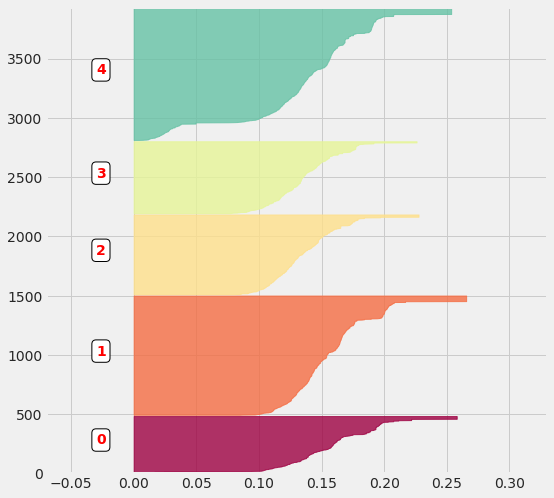

In [ ]:
sample_silhouette_values = silhouette_samples(matrix, clusters)
graph_component_silhouette(n_clusters, [-0.07, 0.33], len(X), sample_silhouette_values, clusters)

Sada možemo pogledati vrstu objekata koje svaki klaster predstavlja. Kako bismo dobile globalni pregled njihovog sadržaja, određujemo koje su ključne riječi najčešće u svakom od njih: 

In [ ]:
liste = pd.DataFrame(liste_produits)
liste_words = [word for (word, occurence) in list_products]

occurence = [dict() for _ in range(n_clusters)]

for i in range(n_clusters):
    liste_cluster = liste.loc[clusters == i]
    for word in liste_words:
        if word in ['art', 'set', 'heart', 'pink', 'blue', 'tag']: continue
        occurence[i][word] = sum(liste_cluster.loc[:, 0].str.contains(word.upper()))

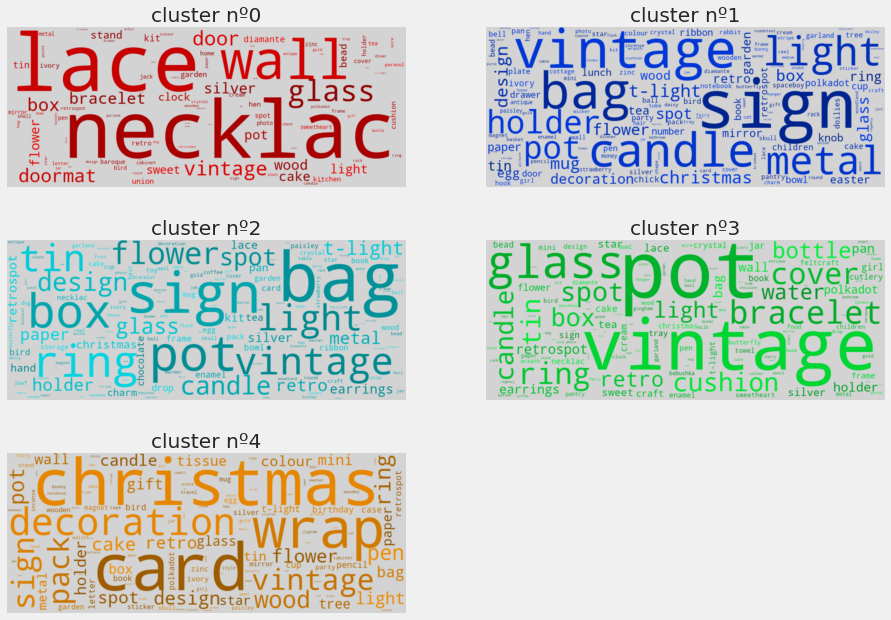

In [ ]:
def random_color_func(word=None, font_size=None, position=None,
                      orientation=None, font_path=None, random_state=None):
    h = int(360.0 * tone / 255.0)
    s = int(100.0 * 255.0 / 255.0)
    l = int(100.0 * float(random_state.randint(70, 120)) / 255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

def make_wordcloud(liste, increment):
    ax1 = fig.add_subplot(4,2,increment)
    words = dict()
    trunc_occurences = liste[0:150]
    for s in trunc_occurences:
        words[s[0]] = s[1]

    wordcloud = WordCloud(width=1000,height=400, background_color='lightgrey', 
                          max_words=1628,relative_scaling=1,
                          color_func = random_color_func,
                          normalize_plurals=False)
    wordcloud.generate_from_frequencies(words)
    ax1.imshow(wordcloud, interpolation="bilinear")
    ax1.axis('off')
    plt.title('cluster nº{}'.format(increment-1))

fig = plt.figure(1, figsize=(14,14))
color = [0, 160, 130, 95, 280, 40, 330, 110, 25]
for i in range(n_clusters):
    list_cluster_occurences = occurence[i]

    tone = color[i] 
    liste = []
    for key, value in list_cluster_occurences.items():
        liste.append([key, value])
    liste.sort(key = lambda x:x[1], reverse = True)
    make_wordcloud(liste, i+1)            

Zaključak: Iz ovog prikaza vidimo da npr. jedan od klastera sadrži predmete koji se mogu povezati s darovima (ključne riječi: Božić, ambalaža, čestitka, itd). Drugi klaster sadrži neke luksuzne predmete i nakit (ključne riječi: ogrlica, narukvica, čipka, srebro, itd). Ipak, također se može primijetiti da se mnoge riječi pojavljuju u različitim skupinama i stoga ih je teško jasno razlikovati.

#### **PCA**

> **Analiza glavnih komponenti (PCA)** je statistička tehnika koja se koristi za analizu varijacija u skupu podataka. To je tehnika smanjenja dimenzionalnosti koja se koristi za smanjenje broja varijabli u skupu podataka uz zadržavanje što je više moguće informacija. PCA funkcionira tako da identificira smjerove u kojima podaci najviše variraju i projicira podatke na novi skup dimenzija (koje se nazivaju glavnim komponentama) koje su linearna kombinacija izvornih varijabli. Ove nove dimenzije su ortogonalne te su rangirane prema količini varijance koju objašnjavaju, pri čemu prva glavna komponenta objašnjava najveću varijancu, a posljednja najmanju.

PCA se obično koristi u raznim područjima, uključujući strojno učenje, rudarenje podataka i obradu slika, za prepoznavanje uzoraka i odnosa u podacima i smanjenje složenosti podataka. Također je koristan za vizualizaciju visokodimenzionalnih podataka i za prepoznavanje odstupanja u podacima.

**PROCES IZVRŠAVANJA PCA**: Da bismo izvršili PCA, prvo moramo standardizirati podatke oduzimanjem srednje vrijednosti i dijeljenjem sa standardnom devijacijom. Zatim računamo matricu kovarijance podataka i upotrijebimo dekompoziciju singularne vrijednosti (SVD) da je rastavimo na glavne komponente. Prva glavna komponenta je smjer u kojem podaci najviše variraju, a preostale glavne komponente su ortogonalne na nju i hvataju preostalu varijancu u podacima.

Kako bismo osigurale da su ti klasteri uistinu različiti, gledamo njihov sastav. S obzirom na veliki broj varijabli početne matrice, prvo izvodimo PCA:

In [ ]:
pca = PCA()
pca.fit(matrix)
pca_samples = pca.transform(matrix)

Provjeravamo količinu varijance koju objašnjava svaka komponenta:

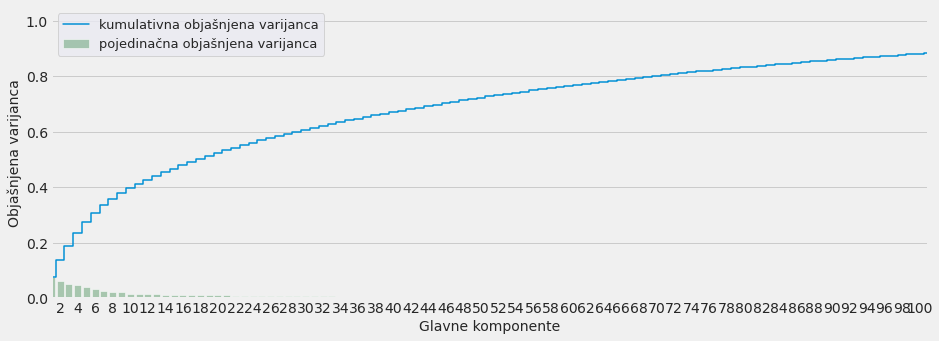

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='kumulativna objašnjena varijanca')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='pojedinačna objašnjena varijanca')
plt.xlim(0, 100)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Objašnjena varijanca', fontsize = 14)
plt.xlabel('Glavne komponente', fontsize = 14)
plt.legend(loc='upper left', fontsize = 13);

Vidimo da je broj komponenti potrebnih za objašnjenje podataka izuzetno važan: potrebno nam je više od 100 komponenti da objasnimo 90% varijance podataka. Stoga smo odlučile zadržati samo ograničen broj komponenti jer se ova dekompozicija izvodi samo za vizualizaciju podataka:

In [ ]:
pca = PCA(n_components=50)
matrix_9D = pca.fit_transform(matrix)
mat = pd.DataFrame(matrix_9D)
mat['cluster'] = pd.Series(clusters)

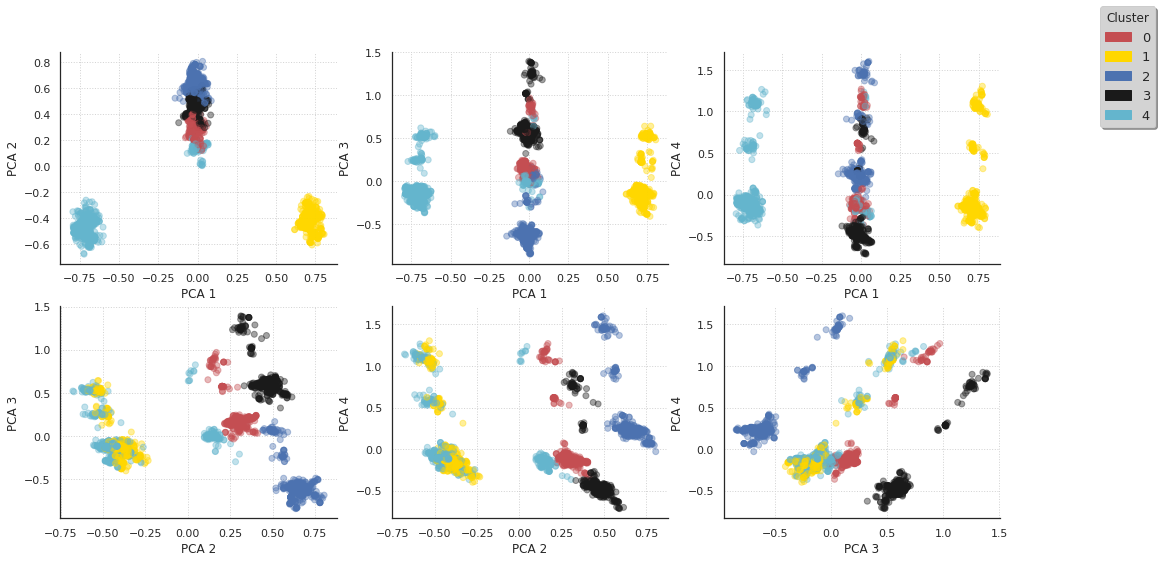

In [ ]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'gold', 2:'b', 3:'k', 4:'c', 5:'g'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (15,8))
increment = 0
for ix in range(4):
    for iy in range(ix+1, 4):    
        increment += 1
        ax = fig.add_subplot(2,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.4) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 9: break
    if increment == 9: break
        
comp_handler = []
for i in range(5):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.97), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.show()

### **5.2. Kategorije kupaca**

U prethodnom odjeljku različite smo proizvode grupirali u pet skupina. Kako bi se pripremio ostatak analize, prvi korak sastoji se od uvođenja ovih informacija u dataframe. Da bismo to učinile, kreiramo kategoričku varijablu categ_product gdje označavamo klaster svakog proizvoda:

In [ ]:
corresp = dict()
for key, val in zip (liste_produits, clusters):
    corresp[key] = val 
    
df_cleaned['categ_product'] = df_cleaned.loc[:, 'Description'].map(corresp)

U sljedećem koraku grupiramo proizvode, a to radimo na način da stvaramo varijable categ_N (N ∈ [0:4]) koje sadrže iznos potrošen u svakoj kategoriji proizvoda:

In [ ]:
for i in range(5):
    col = 'categ_{}'.format(i)        
    df_temp = df_cleaned[df_cleaned['categ_product'] == i]
    price_temp = df_temp['UnitPrice'] * (df_temp['Quantity'] - df_temp['QuantityCanceled'])
    price_temp = price_temp.apply(lambda x:x if x > 0 else 0)
    df_cleaned.loc[:, col] = price_temp
    df_cleaned[col].fillna(0, inplace = True)
    
df_cleaned[['InvoiceNo', 'Description', 'categ_product', 'categ_0', 'categ_1', 'categ_2', 'categ_3','categ_4']][:5]

,InvoiceNo,Description,categ_product,categ_0,categ_1,categ_2,categ_3,categ_4
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,2,0.0,0.0,15.3,0.00,0.0
1,536365,WHITE METAL LANTERN,3,0.0,0.0,0.0,20.34,0.0
2,536365,CREAM CUPID HEARTS COAT HANGER,3,0.0,0.0,0.0,22.00,0.0
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,3,0.0,0.0,0.0,20.34,0.0
4,536365,RED WOOLLY HOTTIE WHITE HEART.,3,0.0,0.0,0.0,20.34,0.0


Do sada su informacije povezane s jednom narudžbom bile podijeljene u nekoliko redaka u skupu podataka (jedan redak po proizvodu). Odlučile sam prikupiti podatke vezane uz određenu narudžbu i unijeti ih u jedan unos. Stoga stvaramo novi dataframe koji sadrži, za svaku narudžbu, iznos košarice, kao i način na koji je raspoređena na 5 kategorija proizvoda:

In [ ]:
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum()
basket_price = temp.rename(columns = {'TotalPrice':'Basket Price'})

for i in range(5):
    col = 'categ_{}'.format(i) 
    temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)[col].sum()
    basket_price.loc[:, col] = temp[col]

df_cleaned['InvoiceDate_int'] = df_cleaned['InvoiceDate'].astype('int64')
temp = df_cleaned.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate_int'].mean()
df_cleaned.drop('InvoiceDate_int', axis = 1, inplace = True)
basket_price.loc[:, 'InvoiceDate'] = pd.to_datetime(temp['InvoiceDate_int'])
basket_price = basket_price[basket_price['Basket Price'] > 0]
basket_price.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,InvoiceNo,Basket Price,categ_0,categ_1,categ_2,categ_3,categ_4,InvoiceDate
0,12346.0,541431,77183.60,0.0,77183.6,0.00,0.00,0.00,2011-01-18 10:01:00.000000000
2,12347.0,542237,475.39,0.0,130.5,53.10,169.20,122.59,2011-01-26 14:29:59.999999744
3,12347.0,549222,636.25,0.0,330.9,71.10,115.00,119.25,2011-04-07 10:43:00.000000000
4,12347.0,556201,382.52,19.9,74.4,78.06,168.76,41.40,2011-06-09 13:01:00.000000000
5,12347.0,562032,584.91,97.8,109.7,119.70,158.16,99.55,2011-08-02 08:48:00.000000000


Dataframe basket_price sadrži informacije za razdoblje od 12 mjeseci. Kasnije će jedan od ciljeva biti razviti model koji će moći karakterizirati i predvidjeti navike kupaca koji posjećuju stranicu, i to od njihovog prvog posjeta. Kako bismo mogle testirati model na realan način, podijelile smo skup podataka zadržavajući prvih 10 mjeseci za razvoj modela i sljedeća dva mjeseca za njegovo testiranje:

In [ ]:
print(basket_price['InvoiceDate'].min(), '->',  basket_price['InvoiceDate'].max())

2011-01-04 10:00:00 -> 2011-12-09 12:50:00


In [ ]:
set_entrainement = basket_price[pd.to_datetime(basket_price['InvoiceDate']).dt.date < datetime.date(2011,10,1)] 
set_test = basket_price[pd.to_datetime(basket_price['InvoiceDate']).dt.date >= datetime.date(2011,10,1)]
basket_price = set_entrainement.copy(deep = True)

Kombinacije potrošačkih narudžbi

Grupiramo različite unose koji odgovaraju istom korisniku. Tako utvrđujemo broj kupnji korisnika, kao i minimalne, maksimalne, prosječne iznose i ukupni iznos potrošen tijekom svih posjeta:

In [ ]:
transactions_per_user=basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()
transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12346.0,1,77183.60,77183.60,77183.600000,77183.60,0.000000,100.000000,0.000000,0.000000,0.000000
1,12347.0,4,382.52,636.25,519.767500,2079.07,5.661185,31.047536,15.485770,29.393912,18.411597
2,12348.0,3,227.44,367.00,301.480000,904.44,0.000000,64.128079,0.000000,0.000000,35.871921
3,12350.0,1,334.40,334.40,334.400000,334.40,0.000000,48.444976,27.900718,0.000000,23.654306
4,12352.0,7,120.33,840.30,313.472857,2194.31,13.516777,15.378866,4.798775,15.526521,50.779060


Konačno, definiramo dvije dodatne varijable koje daju broj dana proteklih od prve kupnje (FirstPurchase) i broj dana od posljednje kupnje (LastPurchase):

In [ ]:
last_date = basket_price['InvoiceDate'].max().date()

first_registration = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].min())
last_purchase      = pd.DataFrame(basket_price.groupby(by=['CustomerID'])['InvoiceDate'].max())

test  = first_registration.applymap(lambda x:(last_date - x.date()).days)
test2 = last_purchase.applymap(lambda x:(last_date - x.date()).days)

transactions_per_user.loc[:, 'LastPurchase'] = test2.reset_index(drop = False)['InvoiceDate']
transactions_per_user.loc[:, 'FirstPurchase'] = test.reset_index(drop = False)['InvoiceDate']

transactions_per_user[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4,LastPurchase,FirstPurchase
0,12346.0,1,77183.60,77183.60,77183.600000,77183.60,0.000000,100.000000,0.000000,0.000000,0.000000,255,255
1,12347.0,4,382.52,636.25,519.767500,2079.07,5.661185,31.047536,15.485770,29.393912,18.411597,59,247
2,12348.0,3,227.44,367.00,301.480000,904.44,0.000000,64.128079,0.000000,0.000000,35.871921,5,248
3,12350.0,1,334.40,334.40,334.400000,334.40,0.000000,48.444976,27.900718,0.000000,23.654306,240,240
4,12352.0,7,120.33,840.30,313.472857,2194.31,13.516777,15.378866,4.798775,15.526521,50.779060,2,226


Kategorija kupaca od posebnog interesa je ona kategorija kupaca koji obave samo jednu kupnju. Jedan od ciljeva može biti, na primjer, ciljati te kupce kako bi ih se zadržalo. Procijenile smo kako ova vrsta kupaca predstavlja 1/3 kupaca na popisu:

In [ ]:
n1 = transactions_per_user[transactions_per_user['count'] == 1].shape[0]
n2 = transactions_per_user.shape[0]
print("Broj klijenata s onim što je jedinstveno: {:<2}/{:<5} ({:<2.2f}%)".format(n1,n2,n1/n2*100))

Broj klijenata s onim što je jedinstveno: 1409/3438  (40.98%)


Izrada kategorija kupaca


Dataframe transactions_per_user sadrži sažetak svih naredbi koje su napravljene. Svaki unos u ovom dataframe-u odgovara određenom klijentu. Koristimo podatke za karakterizaciju različitih vrsta kupaca i zadržavamo samo podskup varijabli:

In [ ]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']
selected_customers = transactions_per_user.copy(deep = True)
matrix = selected_customers[list_cols].to_numpy()

Različite varijable koje smo odabrale imaju prilično različite raspone varijacija i prije nastavka analize, stvaramo matricu u kojoj su ti podaci standardizirani:

In [ ]:
scaler = StandardScaler()
scaler.fit(matrix)
print('Varijable srednje vrijednosti: \n' + '\n' , scaler.mean_)
scaled_matrix = scaler.transform(matrix)

Varijable srednje vrijednosti: 

 [  3.4229203  295.14669052 602.3408502  415.89093888  15.7091369
  25.28004823  20.97779651  16.09754127  21.9354771 ]


Sada ćemo stvoriti klastere kupaca. Prije stvaranja ovih klastera, zanimljivo je definirati bazu manje dimenzije koja omogućuje opis matrice scaled_matrix. U ovom slučaju, koristile smo se ovom bazom kako bismo stvorile prikaz različitih klastera i tako provjeravamo kvalitetu odvajanja različitih grupa. Stoga prethodno izvodimo PCA:

In [ ]:
pca = PCA()
pca.fit(scaled_matrix)
pca_samples = pca.transform(scaled_matrix)

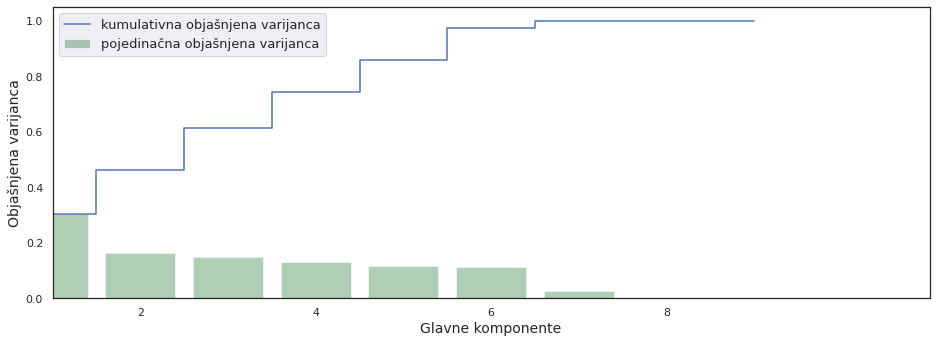

In [ ]:
fig, ax = plt.subplots(figsize=(14, 5))
sns.set(font_scale=1)
plt.step(range(matrix.shape[1]), pca.explained_variance_ratio_.cumsum(), where='mid',
         label='kumulativna objašnjena varijanca')
sns.barplot(np.arange(1,matrix.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, color = 'g',
            label='pojedinačna objašnjena varijanca')
plt.xlim(0, 10)

ax.set_xticklabels([s if int(s.get_text())%2 == 0 else '' for s in ax.get_xticklabels()])

plt.ylabel('Objašnjena varijanca', fontsize = 14)
plt.xlabel('Glavne komponente', fontsize = 14)
plt.legend(loc='best', fontsize = 13);

Izrada kategorija kupaca

U ovom trenutku definiramo klastere klijenata iz standardizirane matrice koja je definirana ranije i pomoću algoritma k-means iz scikit-learn-a. Odabrale smo broj klastera na temelju rezultata siluete i smatramo da je najbolji rezultat postignut s 11 klastera:

In [ ]:
n_clusters = 11
kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=100)
kmeans.fit(scaled_matrix)
clusters_clients = kmeans.predict(scaled_matrix)
silhouette_avg = silhouette_score(scaled_matrix, clusters_clients)
print('Rezultat siluete: {:<.3f}'.format(silhouette_avg))

Rezultat siluete: 0.208


In [ ]:
pd.DataFrame(pd.Series(clusters_clients).value_counts(), columns = ['nb. de clients']).T

,0,2,5,6,9,4,10,7,3,8,1
nb. de clients,1155,832,325,306,274,261,151,117,9,7,1


Postoji određeni nerazmjer u veličinama različitih skupina koje su stvorene. Stoga pokušavamo razumjeti sadržaj ovih klastera kako bismo potvrdile (ili ne) ovo posebno razdvajanje. Koristimo rezultat PCA:

In [ ]:
pca = PCA(n_components=6)
matrix_3D = pca.fit_transform(scaled_matrix)
mat = pd.DataFrame(matrix_3D)
mat['cluster'] = pd.Series(clusters_clients)

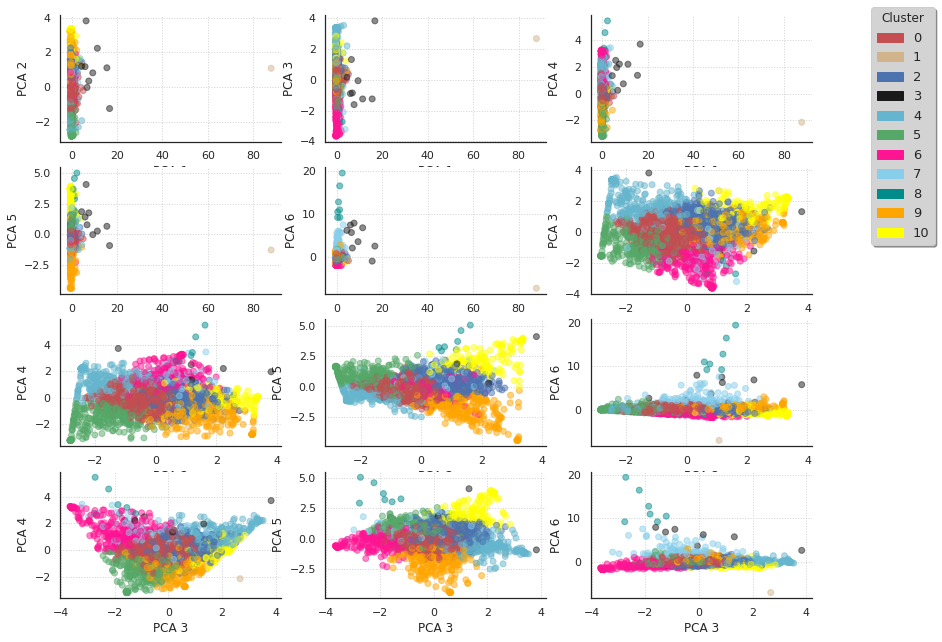

In [ ]:
import matplotlib.patches as mpatches

sns.set_style("white")
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

LABEL_COLOR_MAP = {0:'r', 1:'tan', 2:'b', 3:'k', 4:'c', 5:'g', 6:'deeppink', 7:'skyblue', 8:'darkcyan', 9:'orange',
                   10:'yellow', 11:'tomato', 12:'seagreen'}
label_color = [LABEL_COLOR_MAP[l] for l in mat['cluster']]

fig = plt.figure(figsize = (12,10))
increment = 0
for ix in range(6):
    for iy in range(ix+1, 6):   
        increment += 1
        ax = fig.add_subplot(4,3,increment)
        ax.scatter(mat[ix], mat[iy], c= label_color, alpha=0.5) 
        plt.ylabel('PCA {}'.format(iy+1), fontsize = 12)
        plt.xlabel('PCA {}'.format(ix+1), fontsize = 12)
        ax.yaxis.grid(color='lightgray', linestyle=':')
        ax.xaxis.grid(color='lightgray', linestyle=':')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        
        if increment == 12: break
    if increment == 12: break
        
comp_handler = []
for i in range(n_clusters):
    comp_handler.append(mpatches.Patch(color = LABEL_COLOR_MAP[i], label = i))

plt.legend(handles=comp_handler, bbox_to_anchor=(1.1, 0.9), 
           title='Cluster', facecolor = 'lightgrey',
           shadow = True, frameon = True, framealpha = 1,
           fontsize = 13, bbox_transform = plt.gcf().transFigure)

plt.tight_layout()

Zaključak: Iz ovog prikaza može se vidjeti, na primjer, da prva glavna komponenta omogućuje odvajanje najsitnijih klastera od ostalih. Općenitije, vidimo da uvijek postoji prikaz u kojem će se dva klastera činiti različitima.



Kao i kod kategorija proizvoda, još jedan način gledanja na kvalitetu razdvajanja je gledanje rezultata silouheta unutar različitih klastera:

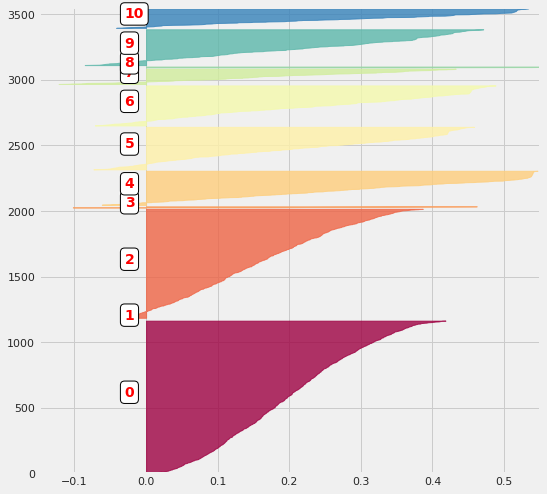

In [ ]:
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
sample_silhouette_values = silhouette_samples(scaled_matrix, clusters_clients)
graph_component_silhouette(n_clusters, [-0.15, 0.55], len(scaled_matrix), sample_silhouette_values, clusters_clients)

Zaključak: U ovoj fazi, potvrdile smo da su različiti klasteri doista nepovezani (barem na globalni način). 

Ostaje razumjeti navike kupaca u svakom klasteru. Da bismo to učinile, prvo započinjemo dodavanjem u dataframe selected_customers varijablu koja definira klaster kojem svaki klijent pripada:

In [ ]:
selected_customers.loc[:, 'cluster'] = clusters_clients

### **5.3. Klasifikacija kupaca** 

Klasifikacija je proces kategorizacije danog skupa podataka u klase, na temelju određenih značajki ili karakteristika podataka. Cilj klasifikacije je predvidjeti klasu ili kategoriju novih instanci, na temelju obrazaca pronađenih u podacima o obuci. Klase su često predstavljene diskretnim oznakama ili vrijednostima, a postupak određivanja klase nove instance poznat je i kao "označavanje" ili "kategoriziranje" te instance.

Na primjer, u filtru neželjene pošte, postupak klasifikacije bio bi utvrđivanje je li e-pošta neželjena pošta ili nije neželjena pošta. U prepoznavanju slike, proces klasifikacije bio bi identificirati objekt prisutan na slici. U medicinskoj dijagnozi, postupak klasifikacije bio bi određivanje vrste bolesti na temelju simptoma.

Klasifikacija je zadatak učenja pod nadzorom, što znači da se model uvježbava na označenim podacima, a cilj je naučiti mapiranje od ulaznih značajki do izlaznih oznaka.

Postoje mnoge metode za klasifikaciju, a neke od najpopularnijih uključuju:

* Logistička regresija: statistička metoda za analizu skupa podataka u kojem postoji jedna ili više neovisnih varijabli koje određuju ishod. Iako je riječ "regresija" u nazivu, logistička regresija se koristi za probleme binarne klasifikacije (one gdje podaci imaju samo dvije klase).
* Support Vector Machines (SVM): metoda za klasificiranje podataka pronalaženjem hiperravnine koja razdvaja podatke u različite klase.
* Nasumična šuma: skupna metoda učenja za klasifikaciju koja funkcionira konstruiranjem mnoštva stabala odlučivanja u vrijeme obuke i izlazom klase koja je način izlaza klasa pojedinačnih stabala.
* Neuronske mreže: skup algoritama, labavo modeliranih prema ljudskom mozgu, koji su dizajnirani za prepoznavanje uzoraka.
* K-najbliži susjedi (KNN): metoda za klasificiranje objekata na temelju najbližih primjera obuke u prostoru značajki.

Najbolja metoda za korištenje ovisi o specifičnom problemu i skupu podataka s kojima radite. Uvijek je dobro isprobati više metoda i usporediti njihovu učinkovitost.

U ovom dijelu cilj je prilagoditi klasifikator koji će razvrstavati potrošače u različite kategorije klijenata. Cilj je omogućiti ovu klasifikaciju pri prvom posjetu. Kako bismo ispunile ovaj cilj, testirat ćemo nekoliko klasifikatora implementiranih u scikit-learn. Prvo, pojednostavnit ćemo njihovu upotrebu, definiramo klasu koja omogućuje povezivanje nekoliko funkcionalnosti zajedničkih ovim različitim klasifikatorima:

In [ ]:
class Class_Fit(object):
    def __init__(self, clf, params=None):
        if params:            
            self.clf = clf(**params)
        else:
            self.clf = clf()

    def train(self, x_train, y_train):
        self.clf.fit(x_train, y_train)

    def predict(self, x):
        return self.clf.predict(x)
    
    def grid_search(self, parameters, Kfold):
        self.grid = GridSearchCV(estimator = self.clf, param_grid = parameters, cv = Kfold)
        
    def grid_fit(self, X, Y):
        self.grid.fit(X, Y)
        
    def grid_predict(self, X, Y):
        self.predictions = self.grid.predict(X)
        print("Preciznost: {:.2f} % ".format(100*metrics.accuracy_score(Y, self.predictions)))
        

Budući da je cilj definirati klasu kojoj klijent pripada i to, već pri prvom posjetu, zadržavamo samo varijable koje opisuju sadržaj košarice, a ne uzimamo u obzir varijable koje se odnose na učestalost posjeta ili varijacije cijene košarice tijekom vremena:

In [ ]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = selected_customers[columns]
Y = selected_customers['cluster']

Dijelimo skup podataka u skupove za treniranje i testiranje:


In [ ]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, train_size = 0.8)

#### **5.3.1. Support Vector Machine (SVM)**

Prvi klasifikator koji koristimo je SVM klasifikator. Kako bi ga koristile, stvaramo instancu klase Class_Fit i zatim pozivamo grid_search(). Kada pozivamo ovu metodu, navodimo kao parametre:

*  hiperparametre za koje ćemo tražiti optimalnu vrijednost
*  broj presavijanja koji će se koristiti za unakrsnu provjeru valjanosti

In [ ]:
svc = Class_Fit(clf = svm.LinearSVC)
svc.grid_search(parameters = [{'C':np.logspace(-2,2,10)}], Kfold = 5)

In [ ]:
svc.grid_fit(X = X_train, Y = Y_train)

In [ ]:
svc.grid_predict(X_test, Y_test)

Preciznost: 74.27 % 


#### Konfuzijska matrica

Čini se da je točnost rezultata dobra. Ipak, kod definiranja različitih klasa došlo je do neravnoteže u veličini između dobivenih klasa. Konkretno, jedan razred sadrži oko 40% klijenata. Stoga je zanimljivo pogledati kako se predviđanja i stvarne vrijednosti uspoređuju s različitim klasama.

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalizirana matrica konfuzije")
    else:
        print('Matrica konfuzije, bez normalizacije')
    #_________________________________________________
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    #_________________________________________________
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    #_________________________________________________
    plt.tight_layout()
    plt.ylabel('Točna labela')
    plt.xlabel('Predviđena labela')

Matrica konfuzije, bez normalizacije


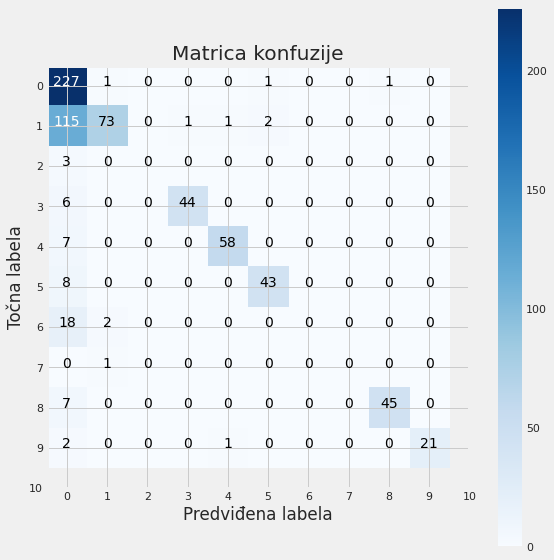

In [ ]:
class_names = [i for i in range(11)]
cnf_matrix = confusion_matrix(Y_test, svc.predictions) 
np.set_printoptions(precision=2)
plt.figure(figsize = (8,8))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize = False, title='Matrica konfuzije')

Zaključak: Iz matrice konfuzije možemo iščitati neke "problematične" labele
- 67 podataka algoritam je označio labelom 1, umjesto labelom 7
- 16 podataka algoritam je označio labelom 1, umjesto labelom 6

### **5.3.2. Logistička regresija**

Logistička regresija je statistička metoda koja se koristi za modeliranje odnosa između binarne zavisne varijable i jedne ili više nezavisnih varijabli. Model logističke regresije varijacija je modela linearne regresije koji se koristi kada je zavisna varijabla binarna (tj. poprima samo dvije vrijednosti kao što su 0 ili 1, točno ili netočno, da ili ne).

U logističkoj regresiji, odnos između nezavisnih varijabli i zavisne varijable modeliran je pomoću logističke funkcije (također poznate kao sigmoidna funkcija), koja proizvodi krivulju u obliku slova S. Logistička funkcija preslikava bilo koji realni broj u vrijednost između 0 i 1, koja se zatim može interpretirati kao vjerojatnost da je zavisna varijabla istinita ili pozitivna.

Cilj logističke regresije je pronaći najbolje parametre (koeficijente) za nezavisne varijable koje će maksimizirati vjerojatnost promatranih podataka, s obzirom na model. Nakon što se model uvježba, može se koristiti za izradu predviđanja o novim podacima, unosom novih vrijednosti za nezavisne varijable i korištenjem logističke funkcije za izračunavanje vjerojatnosti da je zavisna varijabla točna.

Logistička regresija naširoko se koristi u mnogim područjima kao što su medicinska istraživanja, društvene znanosti, marketing i financije. Može biti koristna za razumijevanje odnosa između binarnog ishoda i skupa prediktorskih varijabli, te za izradu predviđanja o vjerojatnosti događanja događaja.

In [ ]:
lr = Class_Fit(clf = linear_model.LogisticRegression)
lr.grid_search(parameters = [{'C':np.logspace(-2,2,20)}], Kfold = 5)
lr.grid_fit(X = X_train, Y = Y_train)
lr.grid_predict(X_test, Y_test)

Preciznost: 87.06 % 


### **5.3.3. K-najbližih susjeda** 

Algoritam k-najbližeg susjeda, često skraćeno k-nn, pristup je klasifikaciji podataka koja procjenjuje koliko je vjerojatno da će podatkovna točka biti članica jedne ili druge grupe, ovisno o kojoj skupini su podatkovne točke najbliže njoj.
K-najbliži susjed je primjer algoritma „lijeni učenik“, što znači da ne gradi model pomoću skupa treninga dok se ne izvrši upit skupa podataka.

Algoritam, gledajući jednu točku na mreži, pokušava utvrditi je li točka u grupi A ili B, promatra stanja točaka u blizini. Raspon je proizvoljno određen, ali poanta je uzeti uzorak podataka. Ako je većina točaka u skupini A, vjerojatno je da će dotična točka podataka biti A, a ne B, i obrnuto.

In [ ]:
knn = Class_Fit(clf = neighbors.KNeighborsClassifier)
knn.grid_search(parameters = [{'n_neighbors': np.arange(1,50,1)}], Kfold = 5)
knn.grid_fit(X = X_train, Y = Y_train)
knn.grid_predict(X_test, Y_test)

Preciznost: 76.89 % 


### **5.3.4. Stablo odluke**

Unutarnji čvorovi odgovaraju značajkama (atributima), grane ispod
svakog čvora odgovaraju vrijednostima dotične značajke, a listovi
odgovaraju klasifikacijskim odlukama (oznakama klase).

Primjer se klasificira slijednim ispitivanjem vrijednosti značajki,
krenuvši od korijena (vrha) stabla prema dnu (listovima), a kada se dosegne list, primjer se klasificira oznakom lista.

In [ ]:
tr = Class_Fit(clf = tree.DecisionTreeClassifier)
tr.grid_search(parameters = [{'criterion' : ['entropy', 'gini'], 'max_features' :['sqrt', 'log2']}], Kfold = 5)
tr.grid_fit(X = X_train, Y = Y_train)
tr.grid_predict(X_test, Y_test)

Preciznost: 85.76 % 


### **5.3.5. Slučajna šuma**

Slučajna šuma (Random Forest) je vrsta metode skupnog učenja u strojnom učenju i znanstvenom programiranju. To je proširenje algoritma stabla odlučivanja koje generira više stabala odlučivanja i kombinira ih kako bi proizvelo točnije i stabilnije predviđanje.

Osnovna ideja koja stoji iza Slučajne šume je uvježbavanje mnogih stabala odlučivanja na nasumičnim podskupovima podataka, a zatim prosjek (za regresiju) ili glasovanje (za klasifikaciju) predviđanja pojedinačnih stabala kako bi se proizvelo konačno predviđanje.

U Slučajnoj šumi, svako se stablo trenira na različitom slučajnom podskupu podataka, također poznatom kao početni uzorak, i slučajnom podskupu značajki. To dovodi do zbirke različitih stabala odlučivanja koja su manje sklona prekomjernom opremanju od jednog stabla odlučivanja. Slučajna šuma također, ima svojstvo važnosti značajke, koja se može koristiti za identifikaciju najvažnijih značajki podataka.

In [ ]:
rf = Class_Fit(clf = ensemble.RandomForestClassifier)
param_grid = {'criterion' : ['entropy', 'gini'], 'n_estimators' : [20, 40, 60, 80, 100],
               'max_features' :['sqrt', 'log2']}
rf.grid_search(parameters = param_grid, Kfold = 5)
rf.grid_fit(X = X_train, Y = Y_train)
rf.grid_predict(X_test, Y_test)

Preciznost: 91.86 % 


###**Pogledajmo**

Konačno, rezultati različitih klasifikatora prikazanih u prethodnim odjeljcima mogu se kombinirati kako bi se poboljšao model klasifikacije. To se može postići odabirom kategorije kupaca kao one koju označava većina klasifikatora. Da bismo to učinile, koristimo metodu VotingClassifier paketa sklearn. Kao prvi korak, prilagođavamo parametre različitih klasifikatora koristeći najbolje prethodno pronađene parametre: 

In [ ]:
rf_best  = ensemble.RandomForestClassifier(**rf.grid.best_params_)
svc_best = svm.LinearSVC(**svc.grid.best_params_)
tr_best  = tree.DecisionTreeClassifier(**tr.grid.best_params_)
knn_best = neighbors.KNeighborsClassifier(**knn.grid.best_params_)
lr_best  = linear_model.LogisticRegression(**lr.grid.best_params_)

Zatim definiramo klasifikator koji spaja rezultate različitih klasifikatora i treniramo ga:

In [ ]:
votingC = ensemble.VotingClassifier(estimators=[('rf', rf_best),('lr', lr_best),
                                                ('knn', knn_best)], voting='soft') 

In [ ]:
votingC = votingC.fit(X_train, Y_train)

Konačno, stvaramo predviđanje za ovaj model:

In [ ]:
predictions = votingC.predict(X_test)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y_test, predictions)))

Precision: 92.44 % 


### **Testiranje predviđanja**

U prethodnom dijelu obučeno je nekoliko klasifikatora kako bi kategorizirali kupce. Do tada se cijela analiza temeljila na podacima iz prvih 10 mjeseci. U ovom odjeljku testiramo model zadnja dva mjeseca skupa podataka koji je pohranjen u okviru podataka set_test:

In [ ]:
basket_price = set_test.copy(deep = True)

Prvo pregrupiramo te zatim podatke formatiramo prema istom postupku koji se koristi na skupu za obuku. Međutim, ispravljamo podatke kako bismo uzele u obzir razliku u vremenu između dva skupa podataka i ponderiramo broj i zbroj varijabli kako bismo dobile ekvivalentnost sa skupom za obuku:

In [ ]:
transactions_per_user=basket_price.groupby(by=['CustomerID'])['Basket Price'].agg(['count','min','max','mean','sum'])
for i in range(5):
    col = 'categ_{}'.format(i)
    transactions_per_user.loc[:,col] = basket_price.groupby(by=['CustomerID'])[col].sum() /\
                                            transactions_per_user['sum']*100

transactions_per_user.reset_index(drop = False, inplace = True)
basket_price.groupby(by=['CustomerID'])['categ_0'].sum()

transactions_per_user['count'] = 5 * transactions_per_user['count']
transactions_per_user['sum']   = transactions_per_user['count'] * transactions_per_user['mean']

transactions_per_user.sort_values('CustomerID', ascending = True)[:5]

,CustomerID,count,min,max,mean,sum,categ_0,categ_1,categ_2,categ_3,categ_4
0,12347.0,10,224.82,1294.32,759.57,7595.70,5.634767,20.017905,32.343299,24.271627,17.732401
1,12349.0,5,1757.55,1757.55,1757.55,8787.75,20.389178,26.506216,12.245455,10.713778,30.145373
2,12352.0,5,311.73,311.73,311.73,1558.65,17.290604,34.420813,8.735123,7.217785,32.335675
3,12356.0,5,58.35,58.35,58.35,291.75,0.000000,0.000000,0.000000,0.000000,100.000000
4,12357.0,5,6207.67,6207.67,6207.67,31038.35,25.189000,18.475531,14.684737,28.350089,13.300643


Zatim zadržavamo samo varijable koje definiraju kategoriju kojoj potrošači pripadaju. Na ovoj razini, koristimo se metodom normalizacije koja je korištena na setu za obuku:


In [ ]:
list_cols = ['count','min','max','mean','categ_0','categ_1','categ_2','categ_3','categ_4']
matrix_test = transactions_per_user[list_cols].to_numpy()
scaled_test_matrix = scaler.transform(matrix_test)

Svaki redak u ovoj matrici sadrži kupovne navike potrošača. U ovoj fazi riječ je o korištenju ovih navika kako bi se definirala kategorija kojoj potrošač pripada. U ovoj fazi važno je imati na umu da ovaj korak ne odgovara samoj fazi klasifikacije. Ovdje pripremamo testne podatke definiranjem kategorije kojoj kupci pripadaju. Međutim, ova definicija koristi podatke dobivene tijekom razdoblja od 2 mjeseca (preko varijabli count, min, max i sum). 

Ovdje je riječ o korištenju dostupnih podataka u razdoblju od dva mjeseca i pomoću tih podataka želimo definirati kategoriju kojoj kupci pripadaju. Zatim se klasifikator može testirati usporedbom njegovih predviđanja s ovim kategorijama. Kako bismo definirale kategoriju kojoj klijenti pripadaju, koristimo se kmeans metodom. Predict metoda ovog primjera izračunava udaljenost potrošača od centroida 11 klasa klijenata i najmanja udaljenost će definirati pripadnost različitim kategorijama:

In [ ]:
Y = kmeans.predict(scaled_test_matrix)

In [ ]:
columns = ['mean', 'categ_0', 'categ_1', 'categ_2', 'categ_3', 'categ_4' ]
X = transactions_per_user[columns]

In [ ]:
classifiers = [(svc, 'Support Vector Machine'),
                (lr, 'Logistic Regression'),
                (knn, 'k-Nearest Neighbors'),
                (tr, 'Decision Tree'),
                (rf, 'Random Forest')]
#______________________________
for clf, label in classifiers:
    print(30*'_', '\n{}'.format(label))
    clf.grid_predict(X, Y)

______________________________ 
Support Vector Machine
Preciznost: 63.83 % 
______________________________ 
Logistic Regression
Preciznost: 71.17 % 
______________________________ 
k-Nearest Neighbors
Preciznost: 63.12 % 
______________________________ 
Decision Tree
Preciznost: 70.39 % 
______________________________ 
Random Forest
Preciznost: 75.04 % 


In [ ]:
predictions = votingC.predict(X)
print("Precision: {:.2f} % ".format(100*metrics.accuracy_score(Y, predictions)))

Precision: 75.20 % 


## **6. Zaključak**

Rad opisan u ovoj bilježnici temelji se na bazi podataka koja pruža pojedinosti o kupnjama obavljenima na platformi za e-trgovinu. Svaki unos u skupu podataka opisuje kupnju proizvoda od strane određenog kupca i na određeni datum. Ukupno se u bazi podataka pojavljuje oko  4000 klijenata. S obzirom na dostupne informacije, odlučile sam razviti klasifikator koji omogućuje predviđanje vrste kupnje koju će kupac obaviti, kao i broj posjeta koje će napraviti tijekom godine, i to od prvog posjeta Internet trgovini. Prva faza ovog rada sastojala se od sređivanja i anlalize podataka. U idućem koraku osvrnule smo se na opisivanje različitih proizvoda koje je prodavalo mjesto, što je bilo predmet prve klasifikacije, gdje smo grupirale različite proizvode u 5 glavnih kategorija proizvoda. U sljedećem koraku izvršile smo klasifikaciju kupaca analizirajući njihove potrošačke navike u razdoblju od 10 mjeseci. Klasificirale smo kupce u 11 glavnih kategorija na temelju vrste proizvoda koje obično kupuju, broja posjeta koje naprave i iznosa koji su potrošili tijekom 10 mjeseci. Nakon što su kategorije uspostavljene, istrenirale smo nekoliko klasifikatora (Support Vector Machine,  Logistička regresija, K-najbližih susjeda, Stablo odluke i Slučajna šuma) čiji je cilj moći klasificirati potrošače u jednu od ovih 11 kategorija i to od njihove prve kupnje. Za to se klasifikator temelji na 5 varijabli koje su iznos košarice trenutne kupovine i postotak potrošen u kategoriji proizvoda podijeljen u n kategorija. Konačno, kvaliteta predviđanja različitih klasifikatora testirana je tijekom posljednja dva mjeseca skupa podataka. Podaci su zatim obrađeni u dva koraka: prvo su svi podaci razmatrani (više od 2 mjeseca) kako bi se definirala kategorija kojoj svaki klijent pripada, a zatim su se predviđanja klasifikatora uspoređivala s ovom dodjelom kategorije. 

Kao zaključak predviđanja možemo reći da 75% klijenata dobiva prave razrede. Izvedba klasifikatora stoga se čini ispravnom s obzirom na potencijalne nedostatke trenutnog modela. Konkretno, pristranost koja nije obrađena tiče činjenice da će kupovne navike potencijalno ovisiti o dobu godine (na primjer, Božić). U praksi, ovaj sezonski učinak može uzrokovati da kategorije definirane tijekom razdoblja od 10 mjeseci budu prilično različite od onih ekstrapoliranih iz posljednja dva mjeseca. Kako bi se ispravila takva pristranost, bilo bi korisno imati podatke koji bi pokrivali duže vremensko razdoblje, što nažalost kod nas nije bio slučaj zbog danog skupa podataka od samo jedne potpune godine.


## **7. Literatura**

https://matplotlib.org/

https://seaborn.pydata.org/

https://pandas.pydata.org/docs/

https://numpy.org/

https://www.investopedia.com/terms/n/normaldistribution.asp

https://paperswithcode.com/method/pca

https://towardsdatascience.com/understanding-pca-fae3e243731d

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

https://www.edesk.com/blog/customer-segmentation-in-ecommerce-everything-you-need-to-know/

https://www.ibm.com/topics/logistic-regression

https://medium.com/@majidahmadkhan/k-nearest-neighbors-the-power-of-proximity-47bed5436ffc

https://medium.com/machine-learning-101/chapter-3-decision-trees-theory-e7398adac567

https://towardsdatascience.com/understanding-random-forest-58381e0602d2

https://medium.com/@imoisharma18/support-vector-machine-for-machine-learning-2d954cd349fe